## Predicting Media Bias in News Articles using Natural Language Processing

This notebook was prepared and submitted by Melissa Lee on May 13th, 2023 to fulfill BrainStation’s Data Science Diploma Capstone requirement, accompanied by an Executive Summary Report. 

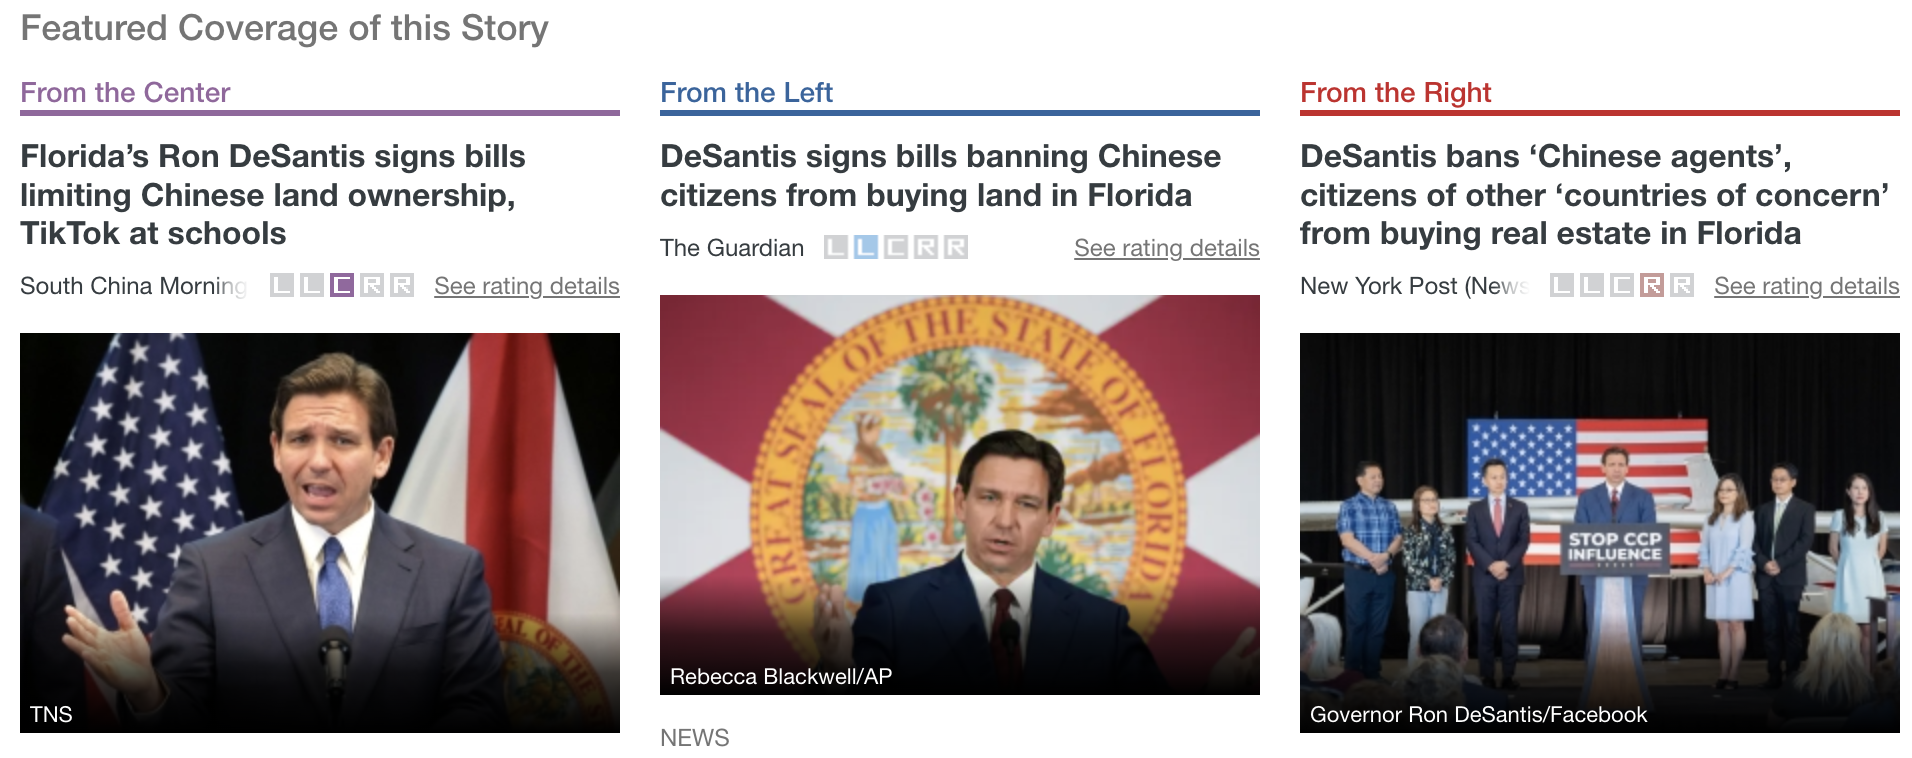

*An example that illustrates how diverse news sources present on the same subject matter through distinct political perspectives.*

*Would you be able to identify the media biases as you scroll through your morning feed?*


# Table of Contents

1. [Introduction](#Introduction)
2. [The Dataset](#The-Dataset)
3. [Dictionary of Dataset](#Dictionary-of-Dataset)
4. [Limitations](#Limitations)
5. [Exploratory Data Analysis](#Exploratory-Data-Analysis) 
6. [Preprocessing](#Preprocessing)
7. [Train/Validation/Test Split](#Train/Validation/Test-Split)
8. [Modeling, Evaluation, and Interpretation](#Modeling,-Evaluation,-and-Interpretation)
9. [Synthetic Minority Oversampling Technique (SMOTE)](#Synthetic-Minority-Oversampling-Technique-(SMOTE)) 
10. [Findings Summary and Conclusion](#Findings-Summary-and-Conclusion)
12. [References](#References)

### Introduction

In modern day news media, there is great concern around misinformation, propaganda, and media bias that is polarizing our communities, especially as it relates to politics. The growing emergence of the natural language processing field within data science and its applications have demonstrated impressive abilities to “discover hidden patterns and capture linguistic regularities that reflect human biases, such as racism, sexism, and ableism” (Caliskan et. al, 2017). 

Word embeddings are numerical representations that are able to capture the grammatical and semantic meaning of the text. We can analyze the patterns in word embeddings using NLP techniques to better understand how bias is formed in the human language. There have been many studies conducted by researchers and academics on how bias and unfairness is shaped in text at various granular levels including at a word, sentence, and paragraph level (Chen et. al, 2020). 

Aware of how polarizing news media content can be, it would be valuable to try to discover patterns of political bias in news articles word by word. If successful, we could potentially build useful tools to support bias-checking and fact-checking solutions, encourage individual critical thinking, and promote a more balanced news coverage world.

#### Problem Statement

The problem statement we are interested in is:

**Can we predict media bias in the news articles that we read every day using machine learning?** 

We know that news portals play a central role in our society in many ways, including how they keep citizens informed and how they bring important topics into public discussion. With that, media organizations bear great responsibility because of their considerable influence on communities in how they shape our values, norms, attitudes, and behaviours. Any form of news media can contain some level of biased content. We are particularly concerned with “media bias” as defined as a bias towards a Left, Right, or Centre political viewpoint. 

By exposing media bias and imbalance news coverage, we can:

1. Increase our understanding of how political bias can be manifested linguistically. For example, is it the choice of words? Is it the context that is created by a sequential combination of words?

2. Learn to better identify political bias in the media we consume every day and build applications and tools to detect misleading information and build critical thinking.

Groups who may be of concern are news consumers who want to be more aware, media publishing companies who want to assess their own biases and provide a more balanced news coverage, and policymakers with interest in media regulation to build more equitable, democratic communities. 

We will perform supervised machine learning modeling to tackle this multi-class problem. 

### The Dataset

The dataset I will work with is a corpus containing 7,775 news articles from 113 different U.S. news sources between June 2012 and March 2019, scraped from ***Allsides.com***, a news aggregator that collects news articles about American politics. It is available on [GitHub here](https://github.com/webis-de/NLPCSS-20). The dataset is a JSON file.

The corpus was first scraped by [Chen et al.(2018)](https://aclanthology.org/W18-6509.pdf) from ***Allsides.com*** which contained 6,447 news articles along with their political bias labels, then further extended to a total of 7,775 articles by [Chen et al. (2020)](https://aclanthology.org/2020.nlpcss-1.16.pdf) through scraping more recent news articles on ***Allsides.com***. 

***Allsides*** has its own Media Bias Chart which positions online news portals on a Left-Centre-Right spectrum. The chart was developed and updated regularly through various methodologies from a multi-partisan lens, including editorial panel reviews, third-party checking, blind bias surveys, and community feedback. As the news articles were scraped, their political bias labels based on their news source were also attached. 

In other words, the provided bias labels are not article-specific but portal-specific.

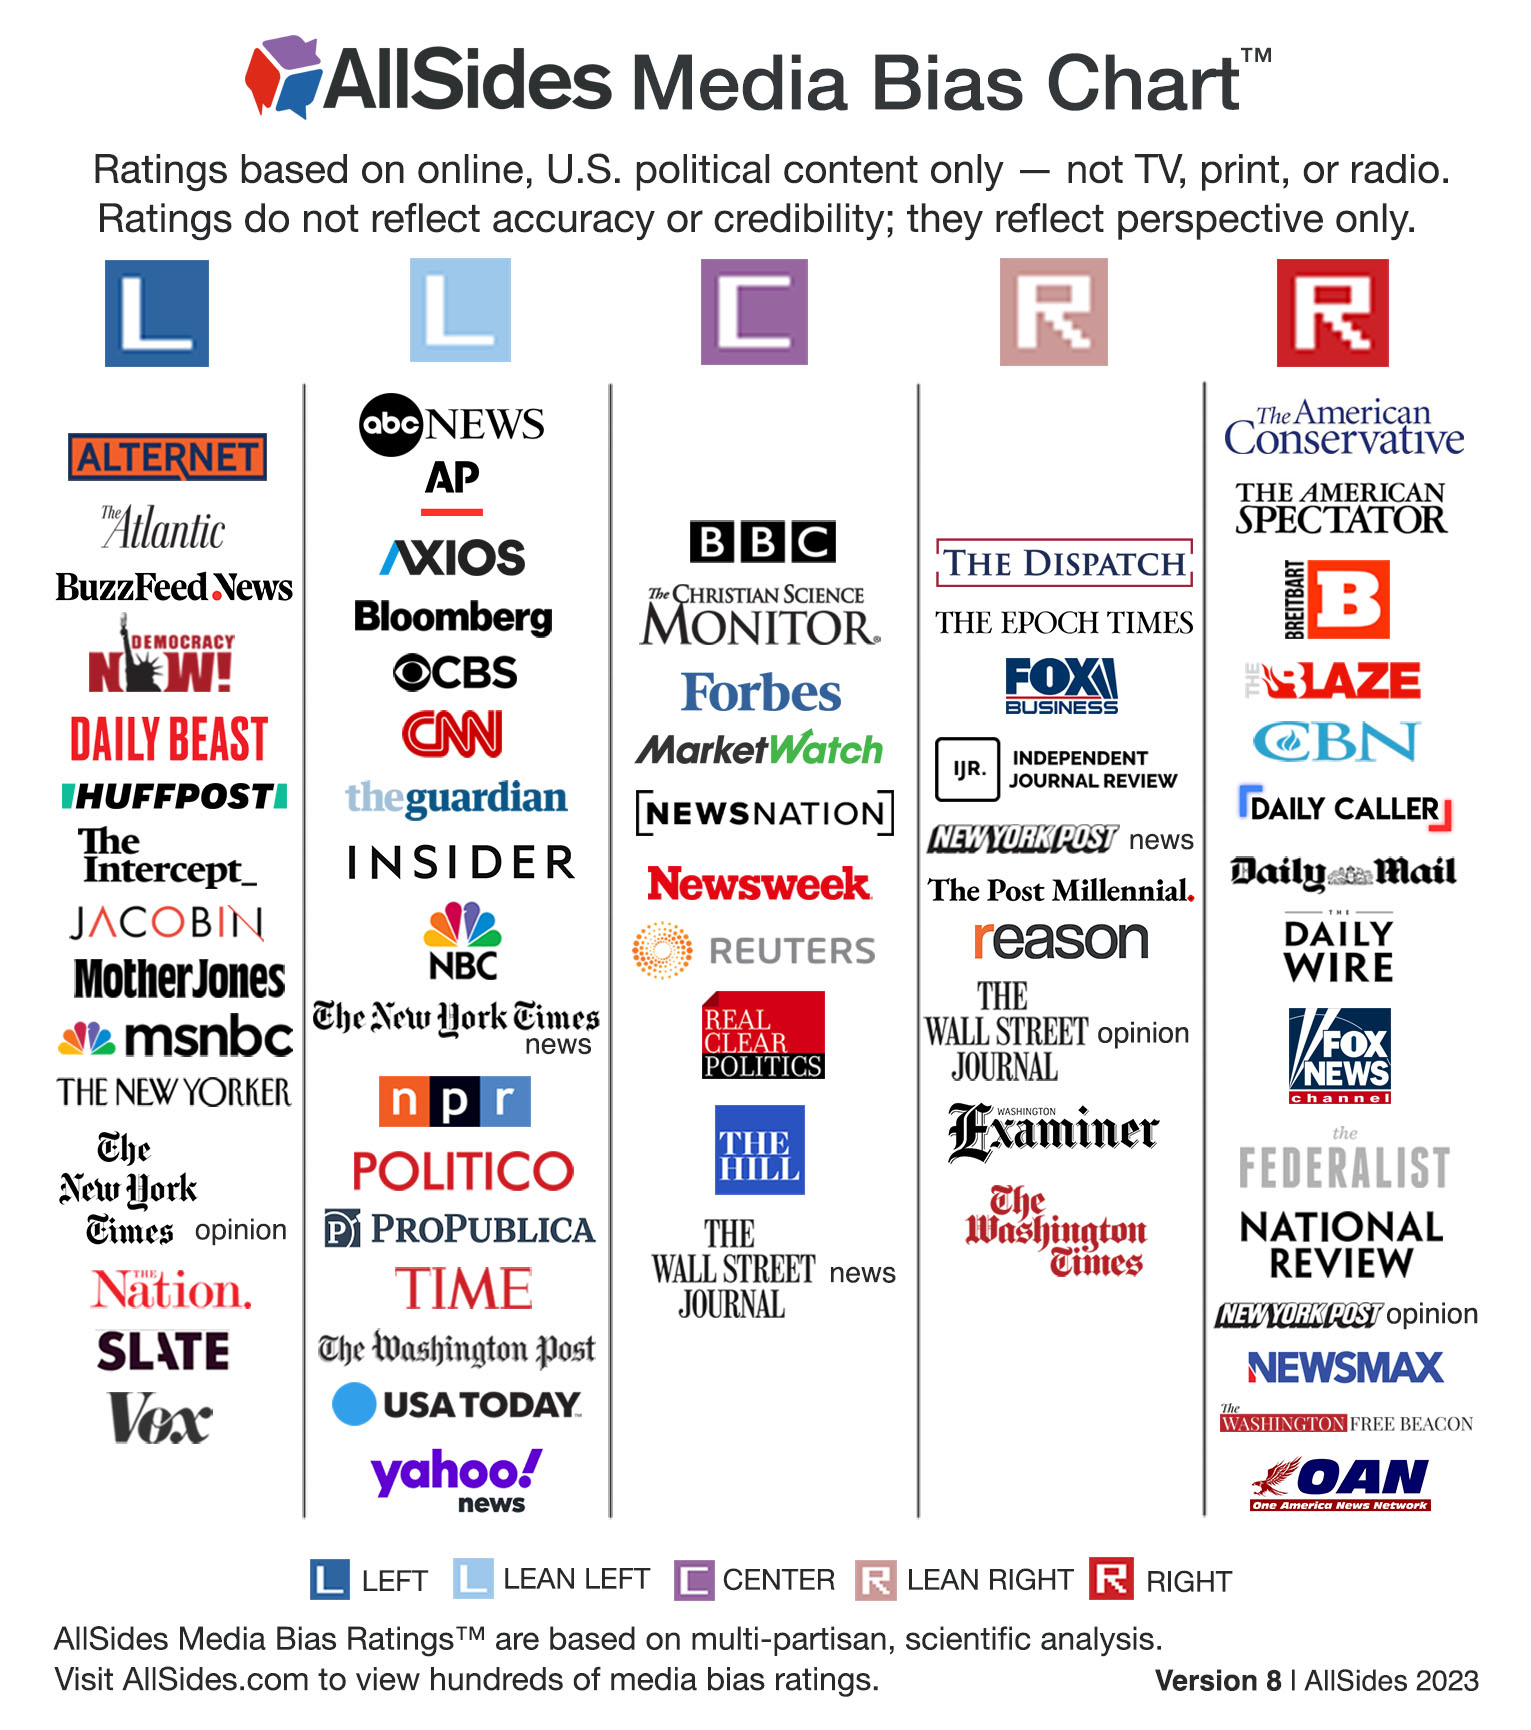

### Dictionary of Dataset

The dataset comes with 8 columns:

- `source`: the news portal
- `title`: the title of the news
- `event_id`: the event id. Articles with the same event have the same id
- `adfontes_fair`: the labels from adfontesmedia.com, whether the article is fair or not (bias, neutral, or unknown)
- `adfontes_political`: the labels from adfontesmedia.com, whehter the article is political bias or not (bias, neutral, or unknown)
- `allsides_bias`: the bias indicated in the allsides.com (left, center, or right)
- `content`: the content of the news
- `misc`: other information, such as author, date, and topics

### Limitations

We will see later in the exploratory data analysis section that the dataset is imbalanced in a few ways:

- **Class distribution**: the majority class is Left, followed by Right then Centre as minority. I decided to experiment modeling and evaluating with this imbalanced class distribution and using other metrics that is not accuracy, and also experiment modeling and evaluating by addressing the class imbalance with the Synthetic Minority Oversampling Technique (SMOTE).
- **News source distribution**: there is a big skew with the news sources that the articles are pulled from, with some instances where there is only one news article each from a handful of news sources that seem to be less-known. This may be due to the availability of articles from these news sources or this may have been intentional by the original scrapers to collect articles from more popular sources. 
- **Topic distribution**: a large amount of news articles are on the topic of "Election: Presidential" alone, and the rest are on other political topics. The variation may have had an influence on the class distribution.  

### Exploratory Data Analysis

We will import some essential packages to begin loading our data and performing some exploratory data analysis.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

As the dataset is a JSON file, we will need to use the `read_json()` method with Pandas.

In [2]:
#Read the JSON file into a pandas DataFrame
with open('released_data.json') as f:
    news_df = pd.read_json(f, lines=True)

Let's take a look at the shape of the dataset and the first five rows.

In [3]:
news_df.shape

(7775, 8)

In [4]:
news_df.head()

,source,title,event_id,adfontes_fair,adfontes_political,allsides_bias,content,misc
0,Fox News,"Trump blasts Howard Schultz, says ex-Starbucks...",0,bias,bias,From the Right,Obama administration alum Roger Fisk and Repub...,"{'time': '2019-01-28 16:10:44.680484', 'topics..."
1,USA TODAY,Trump blasts former Starbucks CEO Howard Schul...,0,bias,neutral,From the Center,WASHINGTON – President Donald Trump took a swi...,"{'time': 'None', 'topics': 'Election: Presiden..."
2,Washington Times,Mick Mulvaney: Trump to secure border 'with or...,0,bias,neutral,From the Right,Acting White House chief of staff Mick Mulvane...,"{'time': 'None', 'topics': 'White House', 'aut..."
3,Washington Times,Trump says 'we'll do the emergency' if border ...,0,bias,neutral,From the Right,President Trump repeated his vow Friday to dec...,"{'time': 'None', 'topics': 'White House, Polit..."
4,BBC News,Trump backs down to end painful shutdown tempo...,0,bias,neutral,From the Center,President Donald Trump has yielded to politica...,"{'time': '2019-01-26 00:00:00', 'topics': 'Whi..."


At first glance, we see that the first column `source` contains the name of the news source, `title` contains the title of the article, `adfontes_fair` tells us that all five of these articles were found to be not fair on the adfontes fairness scale and are therefore found to have some level of bias, `adfontes_political` tells us whether or not each article has a *political* bias specifically, `allsides_bias` provides the political bias label based on the news source the article comes from, `content` contains the content of the news article word-by-word, and `misc` appears to contain a few elements including the date and timestamp that the article was published if available, as well as the article's topic tags. The `event_id` column doesn't seem to have any immediate value.

We can look at more of the data with a sample. 

In [5]:
news_df.sample(5)

,source,title,event_id,adfontes_fair,adfontes_political,allsides_bias,content,misc
490,Fox News,"If Democrats take House, Trump impeachment wil...",0,bias,bias,From the Right,FBN's Stuart Varney on the new committee leade...,"{'time': '2010-07-31 00:00:00', 'topics': 'Ele..."
2940,Fox News,"Trump warns of 'major, major conflict' with No...",0,bias,bias,From the Right,53 percent are in favor of the use of U.S. mil...,"{'time': '2017-04-28 00:00:00', 'topics': 'Nor..."
138,Fox News,Former NY Times editor rips Trump coverage as ...,0,bias,bias,From the Right,Host of 'Mediabuzz' Howard Kurtz says the New ...,"{'time': '2019-01-02 00:00:00', 'topics': 'Med..."
6434,CNN (Web News),"After House stalls, Dems and GOP in Senate reb...",0,bias,neutral,From the Left,"After 24 hectic hours, Congress was back where...","{'time': '2013-10-16 00:00:00', 'topics': 'Bud..."
5404,NBCNews.com,'Simple Common Sense': Jeh Johnson Defends Exe...,0,bias,neutral,From the Left,Immigration took center stage on Capitol Hill ...,"{'time': 'None', 'topics': 'Immigration'}"


We take a look at the data types that we are working with. 

In [6]:
news_df.dtypes

source                object
title                 object
event_id               int64
adfontes_fair         object
adfontes_political    object
allsides_bias         object
content               object
misc                  object
dtype: object

We know we want to build a classification model that will try to predict whether an article is more Left-, Centre-, or Right-leaning based on the news article text that we feed into the model. Let's take a look at our class distribution, which is stored in the `allsides_bias` column.

In [7]:
#use value_counts() to get value counts for each class
news_df['allsides_bias'].value_counts()

From the Left      3684
From the Right     2851
From the Center    1240
Name: allsides_bias, dtype: int64

In [8]:
#use normalize=True to get proportions
news_df['allsides_bias'].value_counts(normalize=True)

From the Left      0.473826
From the Right     0.366688
From the Center    0.159486
Name: allsides_bias, dtype: float64

We can look at our class distribution on a bar chart using `matplotlib`.

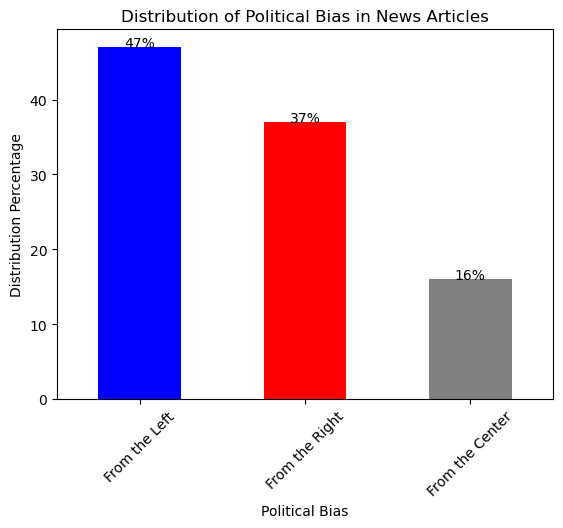

In [9]:
#Get value counts of the allsides_bias column, round to 2
bias_counts = np.round(news_df['allsides_bias'].value_counts(normalize=True),2)*100
#Convert from float to integer
bias_counts = bias_counts.astype(int)

#Define colors for each class
colors = ['blue', 'red', 'gray']

#Create bar chart of the value counts with assigned colors
bias_counts.plot.bar(color=colors)
ax = bias_counts.plot.bar(color=colors)

#Add bias count percentages to each bar
for i, v in enumerate(bias_counts):
    ax.text(i, v , f"{v}%", ha='center')

#Add labels and title to the chart
plt.xlabel('Political Bias')
plt.xticks(rotation=45)
plt.ylabel('Distribution Percentage')
plt.title('Distribution of Political Bias in News Articles')
    
#Show chart
plt.show()

47% or nearly half of our data comes from Left-labeled news sources, followed by 37% Right-labeled, and a small 16% from Centre-labeled. This will present the challenge of overfitting to the majority class when we start modeling, and accuracy would not be the best metric to evaluate the performances of our models. 

We can go two ways:
1. Address the class imbalance by upsampling the Right and Centre classes with the SMOTE method; or
2. Proceed with the class imbalance and use different metrics than accuracy. The imbalance here may be reflective of the biased reality of the availability and circulation of news sources in the real world. We can certainly choose to balance our classes so they are all equal and our models can learn the patterns and relationships amongst all three classes better. 

I decide to experiment proceeding with the class imbalance as it is a reflection of the biased reality and data that is out there. My aim then is not to get a high accuracy measure in my models. Instead I will use **recall**.

#### Why use recall?

Recall measures the proportion of correctly predicted instances (True Positives) among all the true the instances of a specific class (True Positives + False Negatives) - which we have different amounts of. 

When we get to modeling, we will look at all metrics but we will focus on recall as our main metric to evaluate our model performances. 

To get a better sense of the distribution of news sources, we can also look at their value counts. We can also look at the total unique news sources we have. 

In [10]:
news_df['source'].value_counts()

CNN (Web News)           1021
Fox News                 1002
New York Times - News     781
Washington Times          657
HuffPost                  539
                         ... 
Rich Lowry                  1
NPR News                    1
Michael Barone              1
Ross Douthat                1
Accuracy in Media           1
Name: source, Length: 113, dtype: int64

In [11]:
#use nunique to get number of unique values
news_df['source'].nunique()

113

Let's look at the distribution of news sources from each political bias label.

In [12]:
#Distribution of news sources that are 'From the Left'
news_df[news_df['allsides_bias'] == 'From the Left'].groupby('source')['allsides_bias'].value_counts().sort_values(ascending=False)



source                          allsides_bias
CNN (Web News)                  From the Left    1021
New York Times - News           From the Left     781
HuffPost                        From the Left     539
Politico                        From the Left     429
Vox                             From the Left     164
ABC News                        From the Left     100
The Guardian                    From the Left      84
NBCNews.com                     From the Left      72
Salon                           From the Left      56
CBS News                        From the Left      54
Daily Beast                     From the Left      53
Los Angeles Times               From the Left      52
Daily Kos                       From the Left      39
Guest Writer - Left             From the Left      30
Newsweek                        From the Left      28
The Atlantic                    From the Left      21
Vanity Fair                     From the Left      18
ThinkProgress                   From

In [13]:
#Distribution of news sources that are 'From the Left'
news_df[news_df['allsides_bias'] == 'From the Right'].groupby('source')['allsides_bias'].value_counts().sort_values(ascending=False)

source                                allsides_bias 
Fox News                              From the Right    1002
Washington Times                      From the Right     657
Townhall                              From the Right     298
Newsmax                               From the Right     182
Washington Examiner                   From the Right     157
Breitbart News                        From the Right     116
CBN                                   From the Right      88
TheBlaze.com                          From the Right      85
National Review                       From the Right      68
Guest Writer - Right                  From the Right      43
Reason                                From the Right      36
New York Post                         From the Right      34
Fox News Editorial                    From the Right      15
HotAir                                From the Right      15
American Spectator                    From the Right      13
Daily Mail                      

In [14]:
#Distribution of news sources that are 'From the Left'
news_df[news_df['allsides_bias'] == 'From the Center'].groupby('source')['allsides_bias'].value_counts().sort_values(ascending=False)

source                        allsides_bias  
USA TODAY                     From the Center    352
The Hill                      From the Center    288
Reuters                       From the Center    191
BBC News                      From the Center    135
Christian Science Monitor     From the Center    106
Bloomberg                     From the Center     52
Associated Press              From the Center     21
The Week                      From the Center     18
Chicago Tribune               From the Center     18
Business Insider              From the Center     13
Guest Writer                  From the Center     11
CNBC                          From the Center      7
FactCheck.org                 From the Center      7
International Business Times  From the Center      6
RealClearPolitics             From the Center      5
The Independent               From the Center      1
TechCrunch                    From the Center      1
Sunlight Foundation           From the Center      1


We notice that there is a very uneven distribution of news articles from different news sources for all three political labels with majority of Left articles coming from CNN, majority of Right articles coming from Fox News, and majority of Centre articles coming from USA Today. There are also many news sources that only have one article included in this dataset. 

Since our problem is concerned with detecting patterns in each political bias, I don't foresee the imbalanced distribution of news sources as an issue. It might just be that there were more articles available from these news sources.

It would be interesting to see what the top 10 news sources are that the articles come from.

In [15]:
#look at index - this is what we want to group our plot colours by
news_df['allsides_bias'].value_counts().index

Index(['From the Left', 'From the Right', 'From the Center'], dtype='object')

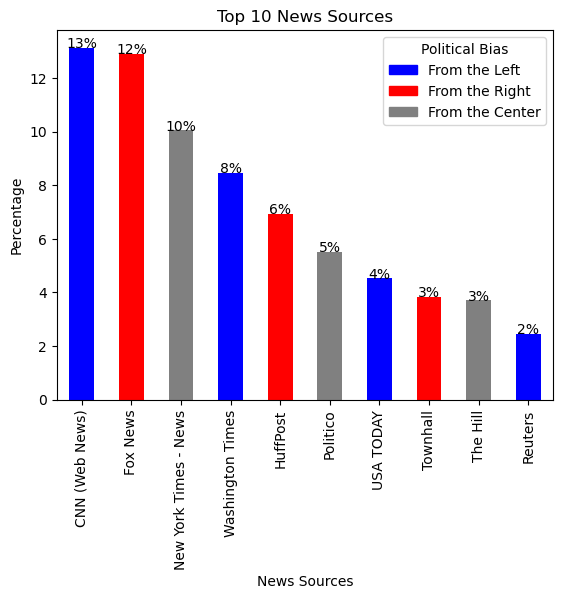

In [16]:
#Get value counts of all news sources
news_source_counts = news_df['source'].value_counts()

#Calculate percentage of each news source out of the total 
percentage = news_source_counts / news_source_counts.sum() * 100

#Extract only the top 10 news sources
top_10_sources = percentage.head(10)

#Create a dictionary to map labels to colors
color_map = {
    'From the Left': 'blue',
    'From the Right': 'red',
    'From the Center': 'grey'}

#Create a list of colors based on the labels in the allsides_political column
colors = [color_map[label] for label in news_df['allsides_bias'].value_counts().index]

#Create bar chart of the percentages with custom colors
ax = top_10_sources.plot.bar(color=colors)

#Add labels and a title to the chart
plt.xlabel('News Sources')
plt.xticks(rotation=90)
plt.ylabel('Percentage')
plt.title('Top 10 News Sources')

#Insert legend for the colors
handles = [plt.Rectangle((0, 0), 1, 1, color=color) for color in color_map.values()]
plt.legend(handles, color_map.keys(), title='Political Bias', loc='upper right')

#Add value count annotations as integers to each bar
for i, v in enumerate(top_10_sources):
    ax.text(i, v, f'{int(v)}%', ha='center')

#Show 
plt.show()

We can see that the top 10 news sources are quite well-known sources.

Next we can also take a look at the topic tags that our news articles have to better understand their topics. We recall that the `misc` column has this information along with other information stored as a dictionary. We will need to extract the topic tags by accessing the `topics` key. 

In [17]:
#Extract the 'topics' part of the 'misc' column and create a new 'topics' column
news_df['topics'] = news_df['misc'].apply(lambda x: x.get('topics'))


In [18]:
#Set display options to show all rows for observation
pd.options.display.max_rows = None

#See value counts for the "topics" column
news_df['topics'].value_counts()


Election: Presidential                             1018
Politics                                            548
White House                                         511
Immigration                                         360
Middle East                                         305
Elections                                           243
Healthcare                                          238
US Senate                                           196
World                                               192
Violence in America                                 186
Supreme Court                                       185
Terrorism                                           184
Budget - Debt                                       183
Gun Control and Gun Rights                          163
US House                                            135
Economy and Jobs                                    128
Media Bias                                          127
National Security                               

In [19]:
#See percentage for the topics column
news_df['topics'].value_counts(normalize=True)

Election: Presidential                             0.130932
Politics                                           0.070482
White House                                        0.065723
Immigration                                        0.046302
Middle East                                        0.039228
Elections                                          0.031254
Healthcare                                         0.030611
US Senate                                          0.025209
World                                              0.024695
Violence in America                                0.023923
Supreme Court                                      0.023794
Terrorism                                          0.023666
Budget - Debt                                      0.023537
Gun Control and Gun Rights                         0.020965
US House                                           0.017363
Economy and Jobs                                   0.016463
Media Bias                              

We see that the leading topic of news article is on *'Election:Presidential'* alone, with 13% of all articles. Many of these topics seem to overlap and are not exclusive from each other, for example *'Politics'* and *'Supreme Court'*. 

This was purely for observation, we will not be using this information for our models.

### Data Cleaning

Are there any null or NaN values that we need to address?

In [20]:
news_df.isnull().sum()

source                0
title                 0
event_id              0
adfontes_fair         0
adfontes_political    0
allsides_bias         0
content               0
misc                  0
topics                0
dtype: int64

For our problem, we want to apply natural language processing to predict whether a news article is Left, Right, or Centre leaning. This means we will only be working with text data. Therefore the columns of interest as our dependent variables will be `title` and `content`, and our independent variable will be the `allsides_bias` column. 

We will drop the other columns that will not be used.

In [21]:
news_df = news_df.drop(columns=['source','event_id','adfontes_political','adfontes_fair','misc','topics'])

We will rename the `allsides_bias` column to simply `political_bias`, with awareness that this bias is based on the news portal, not the article itself as we earlier stated.

In [22]:
news_df.rename(columns={'allsides_bias':'political_bias'},inplace=True)

We will also reorder our columns horizontally so they are more organized.

In [23]:
#Set new order
new_order = ['political_bias','title','content']

#Save new order back into our dataframe
news_df = news_df[new_order]

In [24]:
news_df.head()

,political_bias,title,content
0,From the Right,"Trump blasts Howard Schultz, says ex-Starbucks...",Obama administration alum Roger Fisk and Repub...
1,From the Center,Trump blasts former Starbucks CEO Howard Schul...,WASHINGTON – President Donald Trump took a swi...
2,From the Right,Mick Mulvaney: Trump to secure border 'with or...,Acting White House chief of staff Mick Mulvane...
3,From the Right,Trump says 'we'll do the emergency' if border ...,President Trump repeated his vow Friday to dec...
4,From the Center,Trump backs down to end painful shutdown tempo...,President Donald Trump has yielded to politica...


### Preprocessing

#### Mapping our Classes

First, to preprocess our independent variable column `political_bias`, we need to turn it into a categorical data type. One hot encoding would be suitable for a binary classification, but we are working with multi-classification with three classes. Therefore we will do this with labeling our classes into numbers by mapping them.  

In [25]:
news_df['political_bias'] = news_df['political_bias'].map(
    {'From the Left':0, 'From the Center':1, 'From the Right':2})

We will look at a sample to check if it worked.

In [26]:
news_df.sample(5)

,political_bias,title,content
1132,1,"Under fire for ethics scandals, EPA chief Prui...",WASHINGTON (Reuters) - Environmental Protectio...
4240,2,The gloves are off: Rubio slams Trump as 'con ...,Sen. Marco Rubio on Friday attacked GOP presid...
5663,2,Top general says half of Iraqi army incapable ...,Doug McKelway reports from Washington\nThe U.S...
3737,0,Trump vs. Ryan (again): How we got here,"(CNN)If Donald Trump wins in November, his mos..."
3240,1,Obama should pardon Snowden as well as Manning,President Obama’s brave and principled decisio...


In [27]:
news_df['political_bias'].value_counts()

0    3684
2    2851
1    1240
Name: political_bias, dtype: int64

It looks like it worked. We can now move on to preprocessing the text in our `title` and `content` columns. 

#### Vectorization into Word Embedding Vectors

In order to fit text data into machine learning models, we want our text data to be transformed into numerical data. We are not only looking to tokenize our data, we further want to transform them into word embedding vectors. Just like how we can get the numeric representation of a single word as a token, we can get the numeric reprsentation of the entire text from the article's content and title through their word embedding vectors. 

There are many open-source natural language processing Python packages to support word embedding and other NLP tasks including `nltk` and `Spacy`. We will use `gensim` as it is developed for working with text representations and topic modelling in a user-friendly and computationally efficient way. 


The following steps will be taken to preprocess our text data:

1. **Import `gensim`'s `simple_preprocess` package.** The `simple_preprocess` package performs basic preprocessing on text data primarily used for tokenizing and cleaning text documents. Specifically it tokenizes text, converts the text to lowercase to ensure consistency, and it allows for filtering (lengths, characters, symbols, stopwords, etc.).


2. **Load a pretrained word embedding model by LexVec and Wikipedia.** We need a word embedding model that has the vocabulary of all English words and their relative meanings to each other. We can either build one by collecting data and training data ourselves which would take a lot of work and time, or we have a choice of using open-source pretrained models already available. We will use **LexVec** as it was trained on a full snapshot of the English version of Wikipedia. Files are available on [fastText](https://fasttext.cc/docs/en/english-vectors.html), a library for efficient text classification and representation learning. We will use `gensim` to download and load up our word embedding model.

*A limitation with pre-trained word embedding models that is important to note is that their learning associations are an inherent underlying present in the data. Learning depends on the corpus it was trained on and where the data was. For example the data could come from Wikipedia or Twitter (ex. the glove.twitter.27B model from GloVe). These biases therefore will affect our models in making biased decisions. This problem is beyond the scope of this project, but it is being actively studied. We know that our models are only as good as the data they are built on, and this is the best we have today.*

3. **Create a text-to-vectors function.** The function will apply the `simple_preprocess` method to our text data, exclude stopwords, vectorize text using the LexVec pretrained word embedding model, and put our vectors into a size of 300 dimensions.  


4. **Vectorize our text!** After all that work, we can vectorize our `title` and `content` columns by passing them through our function.



#### Import `gensim`'s `simple_preprocess` package.

In [28]:
#Import
import gensim
import gensim.downloader

#### Load a pretrained word embedding model by LexVec and Wikipedia

Next we load up the `fasttext-wiki-news-subwords-300` pretrained word embedding model from **LexVec** and **Wikipedia**, trained on a subset of Wikipedia articles and contains word embeddings of 300 dimensions for approximately 1 million vocabulary of words. This will take a few minutes as there are a lot of words!

In [29]:
#Load model and assign it to 'model'
model = gensim.downloader.load('fasttext-wiki-news-subwords-300')

#We can also print a list to show all available models in gensim-data
print(list(gensim.downloader.info()['models'].keys()))


['fasttext-wiki-news-subwords-300', 'conceptnet-numberbatch-17-06-300', 'word2vec-ruscorpora-300', 'word2vec-google-news-300', 'glove-wiki-gigaword-50', 'glove-wiki-gigaword-100', 'glove-wiki-gigaword-200', 'glove-wiki-gigaword-300', 'glove-twitter-25', 'glove-twitter-50', 'glove-twitter-100', 'glove-twitter-200', '__testing_word2vec-matrix-synopsis']


#### Create a text-to-vectors function

We will next create a function to convert our text into word embedding vectors. Before we do that, we will import a couple packages that we will need, `nltk`'s `stopwords` and `gensim`'s `simple_preprocess`.

In [30]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to /Users/mel/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [31]:
from gensim.utils import simple_preprocess

We want to average our word embedding vectors because it is a simple way to combine the information from all the words in each article and in each article title and represent their text as a single vector. 

Each word in the text has its own vector representation - these vectors capture semantic and syntactic information about the word. By averaging the word vectors, we obtain a single vector that captures the "meaning" of the text. In other words, the text embedding represents the overall "meaning" or "essence" of the text in vector form. 

We can think of this as "normalizing" our vectors.

In [32]:
#This function tokenizes words, removes stop words, 
#then turns them into word embedding vectors. Refer to documentation.

def text2vec(text):
    """
    Embed a text by averaging the word vectors of the tokenized text. 
    Put embeddings into 300 dimensions.
    Out-of-vocabulary words are replaced by the zero-vector.
    Stop words are removed.
    -----
    
    Input: text (string)
    Output: embedding vector (np.array)
    """
    tokenized = [word for word in simple_preprocess(text, deacc=True) if word not in stop_words]
    
    #We want our embeddings in 300 dimensions
    word_embeddings = [np.zeros(300)]
    for word in tokenized:
        #if the word is in the model then embed
        if word in model:
            vector = model[word]
        #add zeros for out-of-vocab words that are not in the pretrained embedding model 
        else:
            vector = np.zeros(300)
            
        word_embeddings.append(vector)
    
    #Average the word vectors with .mean()
    text_embedding = np.stack(word_embeddings).mean(axis=0)
    
    return text_embedding


Now we can pass our function through our `title` and `content` columns.

In [33]:
#use lambda to apply the function over the columns and assign the results to new columns
news_df['content_vectors'] = news_df['content'].apply(lambda x: text2vec(x))
news_df['title_vectors'] = news_df['title'].apply(lambda x: text2vec(x))


We will check what the resulting columns look like.

In [34]:
news_df.head()

,political_bias,title,content,content_vectors,title_vectors
0,2,"Trump blasts Howard Schultz, says ex-Starbucks...",Obama administration alum Roger Fisk and Repub...,"[0.002087153919089786, -0.016822768109143252, ...","[-0.01876379143108021, -0.02573010888458653, 0..."
1,1,Trump blasts former Starbucks CEO Howard Schul...,WASHINGTON – President Donald Trump took a swi...,"[0.00464946805039079, -0.014137280124885155, -...","[-0.008460780093446373, -0.004323759737114112,..."
2,2,Mick Mulvaney: Trump to secure border 'with or...,Acting White House chief of staff Mick Mulvane...,"[0.0038226888706655395, -0.011528082291054464,...","[-0.00997849996201694, -0.02466761154937558, -..."
3,2,Trump says 'we'll do the emergency' if border ...,President Trump repeated his vow Friday to dec...,"[0.006187743862511172, -0.008489563343666342, ...","[0.007765429360525948, -0.02557814257618572, -..."
4,1,Trump backs down to end painful shutdown tempo...,President Donald Trump has yielded to politica...,"[0.006864060260404373, -0.01889118057607807, 0...","[-0.0011168329157434137, -0.020873000180082663..."


In [35]:
#look at first article's vectors!
news_df['content_vectors'][0]

array([ 0.00208715, -0.01682277, -0.0005427 ,  0.01066504, -0.00803091,
       -0.0168359 ,  0.00799143, -0.09240934,  0.01077583,  0.00517307,
       -0.0219099 , -0.01958529,  0.01416583,  0.01253811, -0.0127783 ,
        0.01085313,  0.066566  , -0.01276529,  0.0607546 ,  0.00170697,
       -0.00176545,  0.00261095,  0.00493596,  0.05266778,  0.00054962,
       -0.00439139,  0.02248982,  0.00628547,  0.02042692, -0.00694938,
       -0.00253239, -0.00062688, -0.01775177, -0.01813522, -0.00134341,
       -0.00157736,  0.00490304,  0.00089653, -0.01392752,  0.004125  ,
       -0.01993952, -0.07758025, -0.01383803,  0.00032855,  0.01161317,
        0.01690283,  0.00588354, -0.00442571,  0.00119747,  0.010032  ,
        0.01844025, -0.00201853,  0.01392682, -0.00166299, -0.06082841,
       -0.00137635, -0.00274988, -0.00420731, -0.06032386,  0.00655079,
       -0.02724583, -0.00608477,  0.11242262, -0.00753879,  0.02053116,
        0.0059238 , -0.00330902,  0.00093659,  0.01038461, -0.00

In [36]:
#check first article's title
news_df['title_vectors'][0]

array([-1.87637914e-02, -2.57301089e-02,  1.10619451e-02,  2.73865459e-02,
        8.24754533e-03, -3.63833964e-02,  3.52590921e-03, -8.21005896e-02,
        1.00591366e-02,  7.23700039e-03, -1.64894631e-02,  1.61613990e-02,
        1.46236633e-02, -1.44641992e-02, -3.41680727e-02,  2.85797090e-02,
        7.08804539e-02,  2.03846484e-03,  4.65265183e-02, -1.50419269e-02,
       -6.46955185e-04,  2.52455273e-02, -5.62329963e-03,  2.92511821e-02,
        1.67909727e-02, -2.92855446e-02,  6.93575458e-02,  1.02609801e-02,
        7.06881687e-04, -7.12899982e-03,  2.26070360e-02,  2.80578180e-03,
       -2.40300356e-02,  2.29214545e-02, -3.01380639e-02, -5.08799988e-03,
       -4.68527356e-03, -1.55885086e-02, -2.99603631e-02,  2.36542730e-03,
       -4.65722999e-02, -7.58670900e-02, -1.97830728e-02, -2.03394631e-02,
        1.33375635e-02,  5.14302180e-02,  3.35801360e-02, -8.63120883e-03,
        7.78176427e-03, -6.72246389e-03,  1.28946816e-02,  2.72841015e-03,
        5.93483639e-02, -

In [37]:
#check shape of the vector
news_df['content_vectors'][0].shape

(300,)

We observe that the vector is an array format and has a shape of 300 vectors. 

We have successfully preprocessed our text data from the `title` and `content` columns into numerical representations of averaged word embedding vector of 300 dimensions. 

### Train/Validation/Test Split

The next step before we feed our data into our models is splitting our data into a train set, validation set, and test set. 

First we set our dependent X variables and our independent y variable.

In [38]:
X = news_df[['title_vectors', 'content_vectors']]
y = news_df['political_bias']

We check if this worked.

In [39]:
X.head()

,title_vectors,content_vectors
0,"[-0.01876379143108021, -0.02573010888458653, 0...","[0.002087153919089786, -0.016822768109143252, ..."
1,"[-0.008460780093446373, -0.004323759737114112,...","[0.00464946805039079, -0.014137280124885155, -..."
2,"[-0.00997849996201694, -0.02466761154937558, -...","[0.0038226888706655395, -0.011528082291054464,..."
3,"[0.007765429360525948, -0.02557814257618572, -...","[0.006187743862511172, -0.008489563343666342, ..."
4,"[-0.0011168329157434137, -0.020873000180082663...","[0.006864060260404373, -0.01889118057607807, 0..."


In [40]:
y.head()

0    2
1    1
2    2
3    2
4    1
Name: political_bias, dtype: int64

Now we will split our dataset such that we set 20% aside as the test set with a remainder of 80%. From the remainder we set aside 30% as our validation and 70% as our training.

We set a random state with each split so our results down the road are reproducible. 

In [41]:
#Import train_test_split from the sklearn library
from sklearn.model_selection import train_test_split

#Split the data into training, validation, and test sets
#20% test, 80% remainder
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Out of the remainder, we split 30% validation and 70% train 
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.3, random_state=42)


We can now check the shapes of our split data.

In [42]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_val shape:", X_val.shape)
print("y_val shape:", y_val.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (4354, 2)
y_train shape: (4354,)
X_val shape: (1866, 2)
y_val shape: (1866,)
X_test shape: (1555, 2)
y_test shape: (1555,)


We know that we had an imalanced class distribution to begin with. Here we can check what the class distributions of our train and test sets look like after the split. 

In [43]:
y_train.value_counts()

0    2055
2    1609
1     690
Name: political_bias, dtype: int64

In [44]:
y_test.value_counts()

0    742
2    567
1    246
Name: political_bias, dtype: int64

We will proceed here with this imbalance and ensure we don't use accuracy as our metric to evaluate our model performances. 

Refer to the second notebook where we experiment with upsampling our data and seeing our models perform there. 

### Modeling, Evaluation, and Interpretation

We have our text data as vectors, however we should convert our vectors into arrays to ensure that the data is in a format that can be processed by machine learning algorithms. Specifically, machine learning libraries like `scikit-learn` and `tensorflow` expect the input data in the form of arrays. 

So we will convert our vectors into arrays by turning them into lists, then applying the `np.array()` method over the `title_vectors` column and `content_vectors` column one after another, for our train, validatin, and test sets. 

In [45]:
#Convert X_train vectors to arrays
X_train_array = np.array(X_train['title_vectors'].tolist())
X_train_array = np.concatenate([X_train_array, np.array(X_train['content_vectors'].tolist())], axis=1)

#Convert X_val vectors to arrays
X_val_array = np.array(X_val['title_vectors'].tolist())
X_val_array = np.concatenate([X_val_array, np.array(X_val['content_vectors'].tolist())], axis=1)

#Convert X_test vectors to arrays
X_test_array = np.array(X_test['title_vectors'].tolist())
X_test_array = np.concatenate([X_test_array, np.array(X_test['content_vectors'].tolist())], axis=1)

# Convert y_train vectors to arrays
y_train_array = np.array(y_train.tolist())

# Convert y_val vectors to arrays
y_val_array = np.array(y_val.tolist())

# Convert y_test vectors to arrays
y_test_array = np.array(y_test.tolist())



We can check our arrays to see if this was successfully done.

For our X arrays, the data from the `title_vectors` and `content_vectors` have been combined into a single array. We can confirm this by checking its shape, which should show 600 total dimensions (300+300).

In [46]:
X_train_array

array([[ 2.65720802e-02,  2.57779978e-02, -4.95184211e-02, ...,
         7.57897478e-03, -3.29609827e-03, -3.46179311e-03],
       [ 8.50720767e-03, -7.77512533e-03, -3.92304381e-02, ...,
         2.40564395e-03, -8.01330241e-03, -1.04994282e-02],
       [ 2.88758889e-02, -1.02192221e-02, -3.07149673e-02, ...,
         9.94059331e-03, -1.01915139e-02,  1.48087742e-03],
       ...,
       [-5.03947496e-03, -4.41728116e-02, -2.71648242e-02, ...,
        -5.15542044e-03,  5.95844189e-05,  2.05731697e-03],
       [ 7.10152436e-03, -2.69868801e-02,  1.72217398e-02, ...,
        -1.56034946e-02, -7.72682562e-03,  8.38014419e-03],
       [ 1.35478160e-02, -4.01191314e-02,  1.10405265e-02, ...,
         3.88345576e-03, -9.24706608e-03, -3.73376878e-03]])

In [47]:
X_train_array[0].shape

(600,)

In [48]:
y_train_array

array([0, 1, 0, ..., 0, 2, 1])

#### Import metrics, GridSearch, and Confusion Matrix

To score our models' performances, we will need to import the various metrics needed, as well as the classification report package so we can print out reports showing all these scores in a single table. 

In [49]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

To find the best parameters we will use `GridSearch` which needs to be imported.

In [50]:
from sklearn.model_selection import GridSearchCV

Finally we import `ConfusionMatrix` so we can look at how confused our models are in classifying the classes. 

In [51]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

Our approach to modeling is as follows:

- **Begin with Logistic Regression as our baseline:** logistic regression is a linear model that assumes a linear relationship between the input features and the output variable. Since our data won't have clear linear relationships, we should not expect performance to be great, however this will serve as our initial baseline. 


- **Try other simple models including KNN, Decision Tree, Random Forest, and XGBoost models for further insights and further establish a baseline.** 


- **Proceed with more complex models including a Neural Network, and Recurrent Neural Networks:** neural networks are generally known to have very good performance in various NLP tasks including text classification as they are able to capture complex patterns and contextual meaning in text. Recurrent neural networks are designed to handle sequential data, which would make them well-suited for text analysis. Compared to neural networks which use a "feed-forward" approach, RNNs can mitigate the "vanishing gradient problem" as they use outputs as inputs for processing and iterative learning. They have an internal memory or hidden state which enables them to process and remember past information. Variants of RNNs like Long Short-Term Memory (LSTM) and Gated Recurrent Unit (GRU) are particularly capable of learning long-term dependencies in text data. We expect the best performance scores with these models!


- **Optimize our models throughout the process with hyperparameter tuning:** we will apply grid search to identify optimal parameters and tune our models to achieve best performances throughout the process. 


- **No scaling required:** there is no scaling required as the vectorization technique already normalizes our data when converted into vectors.

#### Logistic Regression

In [52]:
#Import logistic regression
from sklearn.linear_model import LogisticRegression

In [53]:
#Create an instance of LogisticRegression, set max iterations higher than default 100
#for more iterations
logreg = LogisticRegression(max_iter=1000,random_state=42)

#Fit the model on the training data
logreg.fit(X_train_array, y_train_array)

#Make predictions on the training data
y_train_pred = logreg.predict(X_train_array)

#Calculate the train accuracy score
train_accuracy = accuracy_score(y_train_array, y_train_pred)
y_pred = logreg.predict(X_test_array)

# Evaluate the performance of the model
test_accuracy = accuracy_score(y_test_array, y_pred)

#we need to include an average parameter as our data is a multi-class problem
print("Train Accuracy:", train_accuracy)
print('Test Accuracy:', accuracy_score(y_test_array, y_pred))
print('Test Precision:', precision_score(y_test_array, y_pred, average='weighted'))
print('Test Recall:', recall_score(y_test_array, y_pred, average='weighted'))
print('Test F1-score:', f1_score(y_test_array, y_pred, average='weighted'))


Train Accuracy: 0.5463941203491043
Test Accuracy: 0.5305466237942122
Test Precision: 0.5081208271757156
Test Recall: 0.5305466237942122
Test F1-score: 0.4629208762756479


We will perform a grid search over a range of C parameters to identify the optimal parameter and try again to see if we can improve our performance.

In [54]:
logreg = LogisticRegression(max_iter=1000, random_state=123)

np.random.seed(123)

grid_search = GridSearchCV(logreg, {"C": [0.01, 0.1, 1, 10, 100]})

grid_search.fit(X_val_array, y_val_array)

print("Best parameters: ", grid_search.best_params_)

Best parameters:  {'C': 100}


In [55]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

#Create an instance of LogisticRegression
logreg = LogisticRegression(max_iter=1000, C=100, random_state=42)

np.random.seed(123)

#Fit the model on the train data
logreg.fit(X_train_array, y_train_array)

#Make predictions on the train data
y_train_pred = logreg.predict(X_train_array)

#Calculate scores...
train_accuracy = accuracy_score(y_train_array, y_train_pred)
y_pred = logreg.predict(X_test_array)

# Evaluate the performance of the model
test_accuracy = accuracy_score(y_test_array, y_pred)

print("Train Accuracy:", train_accuracy)
print('Test Accuracy:', accuracy_score(y_test_array, y_pred))
print('Test Precision:', precision_score(y_test_array, y_pred, average='weighted'))
print('Test Recall:', recall_score(y_test_array, y_pred, average='weighted'))
print('Test F1-score:', f1_score(y_test_array, y_pred, average='weighted'))


Train Accuracy: 0.7011943040881947
Test Accuracy: 0.5942122186495177
Test Precision: 0.5781393871033117
Test Recall: 0.5942122186495177
Test F1-score: 0.5789279490021132


We see that after hyperparameter tuning, our logistic regression model test results improved across all metrics by about 6%-10% each. These results serve as our baseline performance that we will attempt to top and improve. However it is also important to note that our training score shot up to 70%, indicating a sign of major overfitting.

We can also display a confusion matrix, which shows the raw counts of true and false predictions for each class in our test set that our model made. 

In [56]:
#Make predictions on the test data
y_pred = logreg.predict(X_test_array)

#Generate confusion matrix
cm = confusion_matrix(y_test_array, y_pred)
print("Confusion Matrix:")
print(cm)

Confusion Matrix:
[[554  40 148]
 [119  55  72]
 [214  38 315]]


We can observe the results better on a confusion matrix display chart.

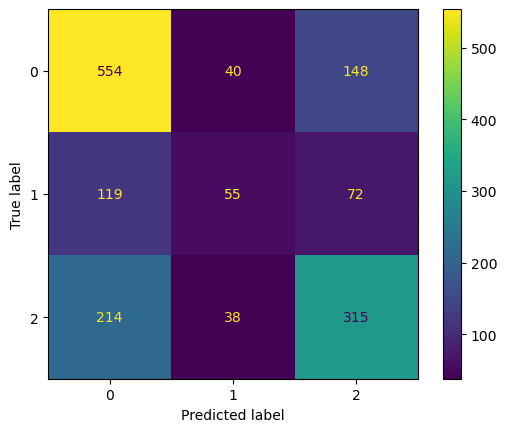

In [57]:
ConfusionMatrixDisplay(cm).plot()
plt.show()

We pair the confusion matrix with a classification report for interpretation.

In [58]:
print(classification_report(y_test_array, y_pred))

              precision    recall  f1-score   support

           0       0.62      0.75      0.68       742
           1       0.41      0.22      0.29       246
           2       0.59      0.56      0.57       567

    accuracy                           0.59      1555
   macro avg       0.54      0.51      0.51      1555
weighted avg       0.58      0.59      0.58      1555



We can see that our model was great at predicting articles from class 0 (Left) with a recall score of 75%, predicting 554 out of 742 true instances. For class 1 (Centre), the model predicted 55/246 or at a recall of 22%. And for class 2 (Right), the model predicted 315/567 or at a recall of 56%.

**Our weighted average recall score for Logistic Regression: 59%.**

### KNN Model

In [59]:
#Import KNN 
from sklearn.neighbors import KNeighborsClassifier

In [61]:
#Instantiate the model & fit it to our data. Try k=3.
KNN_model = KNeighborsClassifier(n_neighbors=3)
KNN_model.fit(X_train_array, y_train_array)

#Score the model on the train and test sets
train_predictions = KNN_model.predict(X_train_array)
train_accuracy = accuracy_score(train_predictions, y_train)
test_predictions = KNN_model.predict(X_test_array)
test_accuracy = accuracy_score(test_predictions, y_test)
y_pred = KNN_model.predict(X_test_array)

print("Train Accuracy:", train_accuracy)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Test Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Test Recall:', recall_score(y_test, y_pred, average='weighted'))
print('Test F1-score:', f1_score(y_test, y_pred, average='weighted'))

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


Train Accuracy: 0.6736334405144695
Test Accuracy: 0.447588424437299
Test Precision: 0.428358437304679
Test Recall: 0.447588424437299
Test F1-score: 0.43230866323355344


/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

Our first run at a KNN model gave us lower scores than what our logisti regression model gave us. We will perform a grid search again, over a range of k_values, to attempt to improve performance. 

In [62]:
#Set range of k values to try from 1 to 40
k_values = list(range(1, 40, 2))

#Create an empty train_scores list and validation_scores list
train_scores = []
validation_scores = []

#Create a loop to fit knn with different k values 
for k in k_values:  
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_array, y_train_array)
    
    #Evaluate
    train_scores.append(knn.score(X_train_array, y_train_array))
    validation_scores.append(knn.score(X_val_array, y_val_array))

#Ask for the best k_values found
best_idx = np.argmin(np.abs(np.array(train_scores) - np.array(validation_scores)))
k_values[best_idx]

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

37

In [63]:
#Second try with our KNN model

#Instantiate the model & fit it to our data. Try n_neighbors=37.
KNN_model = KNeighborsClassifier(n_neighbors=37)
KNN_model.fit(X_train_array, y_train_array)

#Score the model on the train and test sets
train_predictions = KNN_model.predict(X_train_array)
train_accuracy = accuracy_score(train_predictions, y_train_array)

test_predictions = KNN_model.predict(X_test_array)
test_accuracy = accuracy_score(test_predictions, y_test_array)
y_pred = KNN_model.predict(X_test_array)

print("Train Accuracy:", train_accuracy)
print('Test Accuracy:', accuracy_score(y_test_array, y_pred))
print('Test Precision:', precision_score(y_test_array, y_pred, average='weighted'))
print('Test Recall:', recall_score(y_test_array, y_pred, average='weighted'))
print('Test F1-score:', f1_score(y_test_array, y_pred, average='weighted'))

/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be ac

Train Accuracy: 0.5195222783647221
Test Accuracy: 0.4681672025723473
Test Precision: 0.4556576920138669
Test Recall: 0.4681672025723473
Test F1-score: 0.4387907243886959


/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


We will generate the model's confusion matrix, followed by a classification report for interpretation.

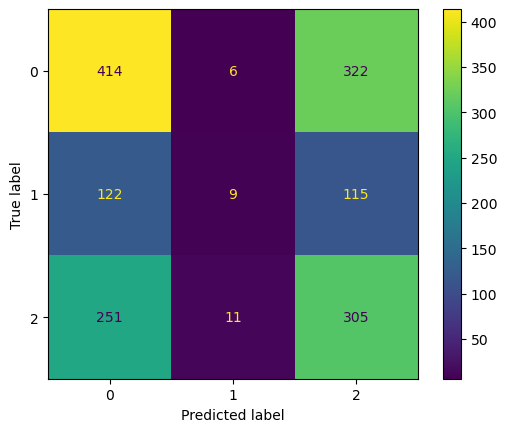

In [64]:
#Generate confusion matrix 
cm = confusion_matrix(y_test_array, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()

In [65]:
print(classification_report(y_test_array, y_pred))

              precision    recall  f1-score   support

           0       0.53      0.56      0.54       742
           1       0.35      0.04      0.07       246
           2       0.41      0.54      0.47       567

    accuracy                           0.47      1555
   macro avg       0.43      0.38      0.36      1555
weighted avg       0.46      0.47      0.44      1555



Interestingly, the model had poorer recall scores than our logistic regression model, giving us 56% recall for the majority class (0, Left), a very low 4% recall for our minority class (1, Centre), and 54% recall for our last class (2, Right). 

**Our weighted average recall score for KNN: 47%.**

### Decision Tree Model

In [66]:
#Import decision tree
from sklearn.tree import DecisionTreeClassifier

In [67]:
#Instantiate the decision stump and fit the model
DT_model = DecisionTreeClassifier(max_depth=2, random_state=42)
DT_model.fit(X_train_array, y_train)
    
#scoring
train_score = DT_model.score(X_train_array, y_train)
test_score = DT_model.score(X_test_array, y_test)
y_pred = DT_model.predict(X_test_array)

print("Train Accuracy:", train_accuracy)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Test Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Test Recall:', recall_score(y_test, y_pred, average='weighted'))
print('Test F1-score:', f1_score(y_test, y_pred, average='weighted'))

Train Accuracy: 0.5195222783647221
Test Accuracy: 0.47266881028938906
Test Precision: 0.381585460618681
Test Recall: 0.47266881028938906
Test F1-score: 0.4099585317107557


/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our first run at a DT model gave us similar scores to what our first KNN model gave us. We will perform a grid search again, over a range of max_depth values, to attempt to improve performance. 

In [68]:
from sklearn.model_selection import GridSearchCV

#Set random seed for reproducibility
np.random.seed(42)

depths = list(range(1, 40, 2))

#Define the parameters to search over
#set range as between 1 and 40
param_grid = {'max_depth': depths}

dt = DecisionTreeClassifier()

#Create a grid search object
grid_search = GridSearchCV(dt, param_grid, cv=5)

#Fit the grid search object to the data
grid_search.fit(X_val_array, y_val)

#Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Validation accuracy: {grid_search.best_score_}")

Best parameters: {'max_depth': 1}
Validation accuracy: 0.45821135180857625


In [69]:
#second run at DT model
#Instantiate the decision stump and fit the model
DT_model = DecisionTreeClassifier(max_depth=1, random_state=42)
DT_model.fit(X_train_array, y_train_array)
    
#scoring
train_score = DT_model.score(X_train_array, y_train_array)
test_score = DT_model.score(X_test_array, y_test_array)
y_pred = DT_model.predict(X_test_array)

print("Train Accuracy:", train_accuracy)
print('Test Accuracy:', accuracy_score(y_test_array, y_pred))
print('Test Precision:', precision_score(y_test_array, y_pred, average='weighted'))
print('Test Recall:', recall_score(y_test_array, y_pred, average='weighted'))
print('Test F1-score:', f1_score(y_test_array, y_pred, average='weighted'))

Train Accuracy: 0.5195222783647221
Test Accuracy: 0.49131832797427655
Test Precision: 0.4084857289285947
Test Recall: 0.49131832797427655
Test F1-score: 0.44504559130643334


/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


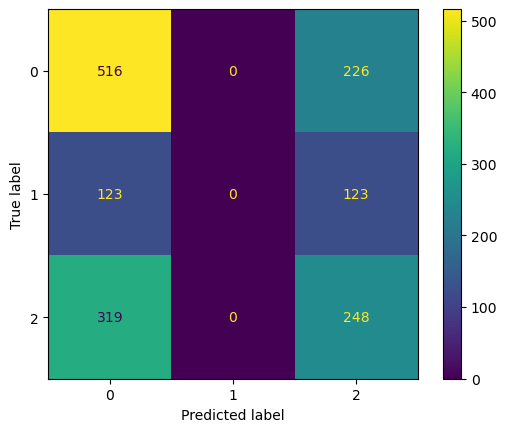

In [70]:
#Generate confusion matrix 
cm = confusion_matrix(y_test_array, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()

In [71]:
print(classification_report(y_test_array, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.70      0.61       742
           1       0.00      0.00      0.00       246
           2       0.42      0.44      0.43       567

    accuracy                           0.49      1555
   macro avg       0.32      0.38      0.34      1555
weighted avg       0.41      0.49      0.45      1555



/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Our Decision Tree model recall score for class 0 (Left) articles is at a high 70%, able to correctly predict 516 out of 742 true instances. The model gave us a recall score of 44% for class 2 (Right) articles, which is considered poor as it is worse than a model randomly guessing. 

For class 1 (Centre) articles, it looks like our model failed to learn any patterns at all, resulting in 0% scores across the board. Seeing that the grid search gave us the best parameter of 1 max depth, I suspect our model is not complex enough to have had the opportunity to learn from the minority class. 

**Our weighted average recall score for Decision Tree: 49%.**

### Random Forest 

In [72]:
#Impport Random Forest classifier
from sklearn.ensemble import RandomForestClassifier

In [73]:
#Instantiate the RF classifier and fit the model
RF_model = RandomForestClassifier(n_estimators=100, random_state=42)
RF_model.fit(X_train_array, y_train_array)

#Score
train_score = RF_model.score(X_train_array, y_train_array)
test_score = RF_model.score(X_test_array, y_test_array)
y_pred = RF_model.predict(X_test_array)

print("Train Accuracy:", train_accuracy)
print('Test Accuracy:', accuracy_score(y_test, y_pred))
print('Test Precision:', precision_score(y_test, y_pred, average='weighted'))
print('Test Recall:', recall_score(y_test, y_pred, average='weighted'))
print('Test F1-score:', f1_score(y_test, y_pred, average='weighted'))

Train Accuracy: 0.5195222783647221
Test Accuracy: 0.535048231511254
Test Precision: 0.5530587029042461
Test Recall: 0.535048231511254
Test F1-score: 0.47913099099672685


In [74]:
#grid search to find best parameter for Random Forest

# Set random seed for reproducibility
np.random.seed(42)

# Define the parameter grid
param_grid = {'n_estimators': [10, 50, 100, 200]}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a grid search object
grid_search = GridSearchCV(rf, param_grid, cv=5)

# Fit the grid search object to the data
grid_search.fit(X_val_array, y_val)

# Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Validation accuracy: {grid_search.best_score_}")

Best parameters: {'n_estimators': 200}
Validation accuracy: 0.5117847772791788


In [75]:
#Instantiate the Random Forest classifier and fit the model with 200 estimators
RF_model = RandomForestClassifier(n_estimators=200, random_state=42)
RF_model.fit(X_train_array, y_train)

#Scoring
train_score = RF_model.score(X_train_array, y_train_array)
test_score = RF_model.score(X_test_array, y_test_array)
y_pred = RF_model.predict(X_test_array)

print("Train Accuracy:", train_accuracy)
print('Test Accuracy:', accuracy_score(y_test_array, y_pred))
print('Test Precision:', precision_score(y_test_array, y_pred, average='weighted'))
print('Test Recall:', recall_score(y_test_array, y_pred, average='weighted'))
print('Test F1-score:', f1_score(y_test_array, y_pred, average='weighted'))

Train Accuracy: 0.5195222783647221
Test Accuracy: 0.5453376205787781
Test Precision: 0.6168651900933602
Test Recall: 0.5453376205787781
Test F1-score: 0.48442186435203455


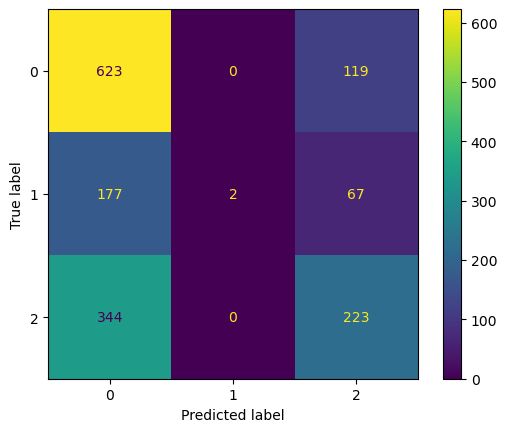

In [76]:
#Generate the confusion matrix and display
cm = confusion_matrix(y_test_array, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()

In [77]:
print(classification_report(y_test_array, y_pred))

              precision    recall  f1-score   support

           0       0.54      0.84      0.66       742
           1       1.00      0.01      0.02       246
           2       0.55      0.39      0.46       567

    accuracy                           0.55      1555
   macro avg       0.70      0.41      0.38      1555
weighted avg       0.62      0.55      0.48      1555



Our Random Forest model has shown us the highest recall score so far for class 0 (Left) articles, predicting 623/742 true instances correctly. It performed poorest however for class 1 (Centre) articles with 1% recall, and 39% for class 2 (Right) articles. 

While our grid search has given us a max_depth parameter of 1, I suspect that this limited our model's ability to learn patterns from the minority class, showing poor very poor recall results. This is not surprising. 

It was expected that our random forest would perform better than our decision tree as it uses an ensembling method. 

**Our weighted average recall score for Random Forest: 55%.**

#### XGBoost

In [78]:
#Import XGBoost
from xgboost import XGBClassifier

In [79]:
#Instantiate the XGB Classifier and fit the model
XGB_model = XGBClassifier(random_state=42)
XGB_model.fit(X_train_array, y_train_array)

#Score 
train_score = XGB_model.score(X_train_array, y_train_array)
test_score = XGB_model.score(X_test_array, y_test_array)
y_pred = XGB_model.predict(X_test_array)

print("Train Accuracy:", train_accuracy)
print('Test Accuracy:', accuracy_score(y_test_array, y_pred))
print('Test Precision:', precision_score(y_test_array, y_pred, average='weighted'))
print('Test Recall:', recall_score(y_test_array, y_pred, average='weighted'))
print('Test F1-score:', f1_score(y_test_array, y_pred, average='weighted'))

Train Accuracy: 0.5195222783647221
Test Accuracy: 0.5684887459807074
Test Precision: 0.5508521378803761
Test Recall: 0.5684887459807074
Test F1-score: 0.5437110147699692


In [80]:
#grid search to find best parameter for XGBoost 
from sklearn.model_selection import GridSearchCV

#Set random seed for reproducibility
np.random.seed(42)

#Define the parameter grid
param_grid = {'n_estimators': [10, 50, 100, 200]}

#Create an XGBoost classifier
xgb_classifier = XGBClassifier(random_state=42)

#Create a grid search object
grid_search = GridSearchCV(xgb_classifier, param_grid, cv=5)

#Fit the grid search object to the data
grid_search.fit(X_val_array, y_val)

#Print the best parameters and the corresponding score
print(f"Best parameters: {grid_search.best_params_}")
print(f"Validation accuracy: {grid_search.best_score_}")


Best parameters: {'n_estimators': 100}
Validation accuracy: 0.525724362374733


In [81]:
#second run at XGB
#Instantiate the XGB Classifier and fit the model
#100 is already the default parameter?
XGB_model = XGBClassifier(n_estimators=100, random_state=42)
XGB_model.fit(X_train_array, y_train_array)

# Scoring
train_score = XGB_model.score(X_train_array, y_train_array)
test_score = XGB_model.score(X_test_array, y_test_array)
y_pred = XGB_model.predict(X_test_array)

print("Train Accuracy:", train_accuracy)
print('Test Accuracy:', accuracy_score(y_test_array, y_pred))
print('Test Precision:', precision_score(y_test_array, y_pred, average='weighted'))
print('Test Recall:', recall_score(y_test_array, y_pred, average='weighted'))
print('Test F1-score:', f1_score(y_test_array, y_pred, average='weighted'))

Train Accuracy: 0.5195222783647221
Test Accuracy: 0.5684887459807074
Test Precision: 0.5508521378803761
Test Recall: 0.5684887459807074
Test F1-score: 0.5437110147699692


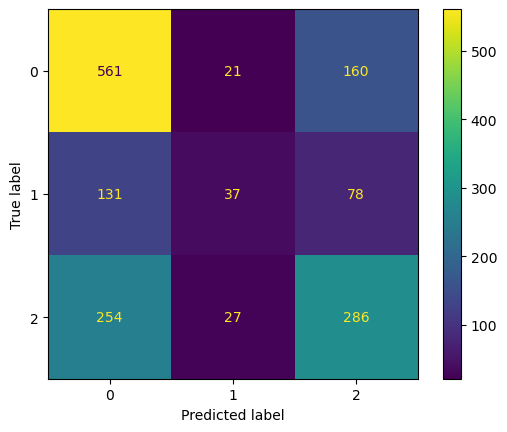

In [82]:
#Generate the confusion matrix and display
cm = confusion_matrix(y_test_array, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()

In [83]:
print(classification_report(y_test_array, y_pred))

              precision    recall  f1-score   support

           0       0.59      0.76      0.66       742
           1       0.44      0.15      0.22       246
           2       0.55      0.50      0.52       567

    accuracy                           0.57      1555
   macro avg       0.52      0.47      0.47      1555
weighted avg       0.55      0.57      0.54      1555



The XGBoost model performed slightly similar than the Random Forest and actually improved the recall score for the minority class. It was able to predict 561/742 true instances of our majority class (0, Left) correctly with a recall of 76%. 

Previously our Random Forest had a recall score of 1% for our minority class but our XGBoost resulted in a 15% recall score. XGBoost had a better recall score for our class 2 (Right) articles at 50%. 

**Our weighted average recall score for XGBoost: 57%.**

#### Results of our simple models

We started at a baseline weighted average recall score across all three classes of 59% with our Logistic Regression model. The closest weighted average recall score to this after fitting the data to other simpler models was **57% recall from our XGBoost model.** The highest recall score we achieved to predict the majority class (0, Left) was an impressive **84% recall from our Random Forest model.**

These are the results of our simple models. We will now move on to more complex models with neural networks and deep recurrent neural networks. 

### Neural Network

In [84]:
#Import tensorflow and keras to build neural networks with
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

2023-05-12 22:15:50.753374: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [85]:
#Random seeds for reproducibility
tf.random.set_seed(123)

#Instantiate the model architecture
model = Sequential()

#First dense layer taking input of 600 features
#Followed by the second dense layer
#Followed by the output layer
model.add(Dense(units=64, activation='relu', input_shape=(600,))) 
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

#Compile the model
#Use sparse_categorical_crossentropy as we have multiple classes
#Optimizer "adam" is a default learning rate of 0.001 which we will keep for now
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Train the model for 50 epochs with a batch size of 64
model.fit(X_train_array, y_train_array, 
          validation_data=(X_val_array, y_val_array), epochs=50, batch_size=64)

#Evaluate the model on the test data
#Make predictions on the test set
y_pred_probs = model.predict(X_test_array)
y_pred = np.argmax(y_pred_probs, axis=1)

#Calculate precision, recall, and F1 score
report = classification_report(y_test_array, y_pred)
print(report)


Epoch 1/50
69/69 [==============================] - 1s 5ms/step - loss: 1.0210 - accuracy: 0.4695 - val_loss: 1.0119 - val_accuracy: 0.4753
Epoch 2/50
69/69 [==============================] - 0s 2ms/step - loss: 1.0048 - accuracy: 0.4752 - val_loss: 1.0056 - val_accuracy: 0.4759
Epoch 3/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9952 - accuracy: 0.4782 - val_loss: 0.9984 - val_accuracy: 0.4759
Epoch 4/50
69/69 [==============================] - 0s 3ms/step - loss: 0.9827 - accuracy: 0.4874 - val_loss: 0.9894 - val_accuracy: 0.4861
Epoch 5/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9696 - accuracy: 0.4991 - val_loss: 0.9922 - val_accuracy: 0.4984
Epoch 6/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9576 - accuracy: 0.5237 - val_loss: 0.9824 - val_accuracy: 0.4979
Epoch 7/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9394 - accuracy: 0.5395 - val_loss: 0.9731 - val_accuracy: 0.5166
Epoch 8/50
69/69 [==

In [86]:
print("Train Accuracy:", train_accuracy)
print('Test Accuracy:', accuracy_score(y_test_array, y_pred))
print('Test Precision:', precision_score(y_test_array, y_pred, average='weighted'))
print('Test Recall:', recall_score(y_test_array, y_pred, average='weighted'))
print('Test F1-score:', f1_score(y_test_array, y_pred, average='weighted'))

Train Accuracy: 0.5195222783647221
Test Accuracy: 0.5807073954983922
Test Precision: 0.5701315389108257
Test Recall: 0.5807073954983922
Test F1-score: 0.5634915541892704


Let's try adding an additional dense layer, and increase the number of units in the first dense layer. 

In [87]:
#Add additional dense layer, increase first dense layer units to 128
#Keeping everything else constant

#random seeds for reproducibility
np.random.seed(123)

#Define the model architecture
model = Sequential()

#First dense layer taking input of 600 features
#Followed by the second dense layer
#Followed by a third dense layer
# Followed by the output layer
model.add(Dense(units=128, activation='relu', input_shape=(600,))) 
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

#Compile the model
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Train the model for 50 epochs with a batch size of 64
model.fit(X_train_array, y_train, 
          validation_data=(X_val_array, y_val), epochs=50, batch_size=64)

#Evaluate the model on the test data
#Make predictions on the test set
y_pred_probs = model.predict(X_test_array)
y_pred = np.argmax(y_pred_probs, axis=1)

#Calculate precision, recall, and F1 score
report = classification_report(y_test, y_pred)
print(report)


Epoch 1/50
69/69 [==============================] - 1s 4ms/step - loss: 1.0210 - accuracy: 0.4720 - val_loss: 1.0114 - val_accuracy: 0.4753
Epoch 2/50
69/69 [==============================] - 0s 3ms/step - loss: 1.0035 - accuracy: 0.4720 - val_loss: 1.0028 - val_accuracy: 0.4753
Epoch 3/50
69/69 [==============================] - 0s 3ms/step - loss: 0.9917 - accuracy: 0.4745 - val_loss: 0.9969 - val_accuracy: 0.4780
Epoch 4/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9799 - accuracy: 0.4910 - val_loss: 0.9855 - val_accuracy: 0.4973
Epoch 5/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9565 - accuracy: 0.5188 - val_loss: 0.9849 - val_accuracy: 0.4877
Epoch 6/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9359 - accuracy: 0.5308 - val_loss: 0.9875 - val_accuracy: 0.5123
Epoch 7/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9248 - accuracy: 0.5345 - val_loss: 0.9762 - val_accuracy: 0.5016
Epoch 8/50
69/69 [==

Adding an additional layer seemed to make the model perform worse, perhaps due to overfitting. We return to the first architecture and try adjusting the learning rate instead.

In [88]:
#Random seeds for reproducibility
np.random.seed(123)

#Instantiate the model architecture
model = Sequential()

#First dense layer taking input of 600 features
#Followed by the second dense layer
#Followed by the output layer
model.add(Dense(units=64, activation='relu', input_shape=(600,))) 
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

#Compile the model
#Use sparse_categorical_crossentropy as we have multiple classes
#Optimizer "adam" is a default learning rate of 0.001 which we will keep for now
model.compile(loss="sparse_categorical_crossentropy", 
              optimizer=Adam(learning_rate=0.01), metrics=["accuracy"])

#Train the model for 50 epochs with a batch size of 64
model.fit(X_train_array, y_train_array, 
          validation_data=(X_val_array, y_val_array), epochs=50, batch_size=64)

#Evaluate the model on the test data
#Make predictions on the test set
y_pred_probs = model.predict(X_test_array)
y_pred = np.argmax(y_pred_probs, axis=1)

#Calculate precision, recall, and F1 score
report = classification_report(y_test_array, y_pred)
print(report)


Epoch 1/50
69/69 [==============================] - 1s 4ms/step - loss: 1.0095 - accuracy: 0.4676 - val_loss: 0.9995 - val_accuracy: 0.4764
Epoch 2/50
69/69 [==============================] - 0s 3ms/step - loss: 0.9856 - accuracy: 0.4874 - val_loss: 1.0194 - val_accuracy: 0.3901
Epoch 3/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9967 - accuracy: 0.4511 - val_loss: 1.0098 - val_accuracy: 0.4759
Epoch 4/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9701 - accuracy: 0.4892 - val_loss: 0.9821 - val_accuracy: 0.4962
Epoch 5/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9496 - accuracy: 0.5034 - val_loss: 1.0124 - val_accuracy: 0.4678
Epoch 6/50
69/69 [==============================] - 0s 3ms/step - loss: 0.9296 - accuracy: 0.5322 - val_loss: 0.9920 - val_accuracy: 0.5096
Epoch 7/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9057 - accuracy: 0.5462 - val_loss: 1.0206 - val_accuracy: 0.4394
Epoch 8/50
69/69 [==

This still does not beat our weighted average recall score of 58% from the first run. We will return to the first architecture, and perhaps try more epochs for more iterations and learning to see if there is an increase in performance.

We will try 1000 epochs instead of 50.

In [89]:
#Random seeds for reproducibility
np.random.seed(123)

#Instantiate the model architecture
model = Sequential()

#First dense layer taking input of 600 features
#Followed by the second dense layer
#Followed by the output layer
model.add(Dense(units=64, activation='relu', input_shape=(600,))) 
model.add(Dense(units=32, activation='relu'))
model.add(Dense(units=3, activation='softmax'))

#Compile the model
#Use sparse_categorical_crossentropy as we have multiple classes
#Optimizer "adam" is a default learning rate of 0.001 which we will keep for now
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Train the model for 50 epochs with a batch size of 64
model.fit(X_train_array, y_train_array, 
          validation_data=(X_val_array, y_val_array), epochs=1000, batch_size=64)

#Evaluate the model on the test data
#Make predictions on the test set
y_pred_probs = model.predict(X_test_array)
y_pred = np.argmax(y_pred_probs, axis=1)

#Calculate precision, recall, and F1 score
report = classification_report(y_test_array, y_pred)
print(report)


Epoch 1/1000
69/69 [==============================] - 1s 3ms/step - loss: 1.0256 - accuracy: 0.4580 - val_loss: 1.0130 - val_accuracy: 0.4759
Epoch 2/1000
69/69 [==============================] - 0s 2ms/step - loss: 1.0042 - accuracy: 0.4830 - val_loss: 1.0097 - val_accuracy: 0.4984
Epoch 3/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.9977 - accuracy: 0.4743 - val_loss: 0.9981 - val_accuracy: 0.4898
Epoch 4/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.9840 - accuracy: 0.5016 - val_loss: 0.9903 - val_accuracy: 0.4979
Epoch 5/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.9702 - accuracy: 0.5154 - val_loss: 0.9841 - val_accuracy: 0.5155
Epoch 6/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.9562 - accuracy: 0.5262 - val_loss: 0.9775 - val_accuracy: 0.5273
Epoch 7/1000
69/69 [==============================] - 0s 2ms/step - loss: 0.9382 - accuracy: 0.5446 - val_loss: 0.9694 - val_accuracy: 0.5327
Epoch 

Our weighted average recall score after 1000 epochs is 54%, still lower than 58% from our first architecture. We can conclude then that our best neural network is
- learning rate of 0.001
- epochs at 50
- batch size 64
- x1 input layer at 'relu', x1 hidden layer at 'relu', and x1 output layer 

Let's get a confusion matrix for further interpretation. 

In [228]:
#Random seeds for reproducibility
tf.random.set_seed(123)

#Instantiate the model architecture
NN_model = Sequential()

#First dense layer taking input of 600 features
#Followed by the second dense layer
#Followed by the output layer
NN_model.add(Dense(units=64, activation='relu', input_shape=(600,))) 
NN_model.add(Dense(units=32, activation='relu'))
NN_model.add(Dense(units=3, activation='softmax'))

#Compile the model
#Use sparse_categorical_crossentropy as we have multiple classes
#Optimizer "adam" is a default learning rate of 0.001 which we will keep for now
NN_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Train the model for 50 epochs with a batch size of 64
history = NN_model.fit(X_train_array, y_train_array, 
          validation_data=(X_val_array, y_val_array), epochs=50, batch_size=64)

#Evaluate the model on the test data
#Make predictions on the test set
y_pred_probs = NN_model.predict(X_test_array)
y_pred = np.argmax(y_pred_probs, axis=1)

#Calculate precision, recall, and F1 score
report = classification_report(y_test_array, y_pred)
print(report)


Epoch 1/50
69/69 [==============================] - 1s 4ms/step - loss: 1.0236 - accuracy: 0.4699 - val_loss: 1.0135 - val_accuracy: 0.4753
Epoch 2/50
69/69 [==============================] - 0s 2ms/step - loss: 1.0063 - accuracy: 0.4770 - val_loss: 1.0082 - val_accuracy: 0.4764
Epoch 3/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9995 - accuracy: 0.4763 - val_loss: 0.9999 - val_accuracy: 0.4780
Epoch 4/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9873 - accuracy: 0.4828 - val_loss: 0.9913 - val_accuracy: 0.4968
Epoch 5/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9725 - accuracy: 0.5126 - val_loss: 0.9942 - val_accuracy: 0.4839
Epoch 6/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9585 - accuracy: 0.5239 - val_loss: 0.9772 - val_accuracy: 0.5273
Epoch 7/50
69/69 [==============================] - 0s 2ms/step - loss: 0.9417 - accuracy: 0.5370 - val_loss: 0.9704 - val_accuracy: 0.5300
Epoch 8/50
69/69 [==

Let's also check our model's train accuracy score to check overfitting.

In [229]:
train_acc = history.history['accuracy']

# Print train accuracy for the last epoch
train_acc_last_epoch = train_acc[-1]
print("Train Accuracy:", train_acc_last_epoch)


Train Accuracy: 0.7737712264060974


Our model's test accuracy score is 59% compared to its train accuracy score of 74%, telling us that it is severely overfitted.

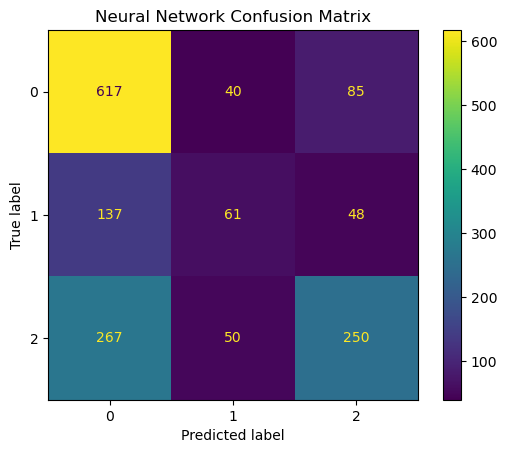

In [231]:
#Generate the confusion matrix and display
cm = confusion_matrix(y_test_array, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.title('Neural Network Confusion Matrix')
plt.show()


Additionally we can plot our model loss by looking at how the train and validation scores change over the epochs.

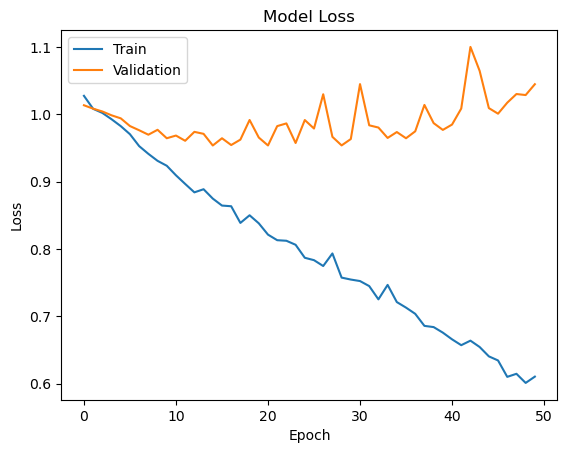

In [131]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'])
plt.show()

Looking at this result, we can see that the training loss continues to decrease after each epoch. However, the validation loss starts to increase. After a certain number of epochs our model begins to overfit to our training data. We can use this plot to determine the number of epochs we want to run our model for. In this example, we would probably stop training our model after about 5 epochs to prevent overfitting. 

Overall our neural network gave us a high recall score for our majority class (0, Left) of 80%, correctly predicting 597/742 true instances, a recall score of 26% for our minority class (1, Centre) and recall score of 44% for our class 2 (Right). 

**Our weighted average recall score for Neural Network: 58-59%.**

This ties with the baseline weighted average recall score of 59% that we saw from our Logistic Regression model. 

We did we earlier see that the Neural Network was severely overfit with a much higher train accuracy score. We can try applying regularization to the model to see if we can reduce overfitting. 

In [134]:
#Try adding a regularizer 

#Random seeds for reproducibility
tf.random.set_seed(123)

#Instantiate the model architecture
model = Sequential()

#Create a regularizer with a factor of 0.0005 and apply it to all hidden layers
regularizer = keras.regularizers.l2(0.0005)

#First dense layer taking input of 600 features
#Followed by the second dense layer
#Followed by the output layer
model.add(Dense(units=64, activation='relu', input_shape=(600,),kernel_regularizer=regularizer)) 
model.add(Dense(units=32, activation='relu', kernel_regularizer=regularizer))
model.add(Dense(units=3, activation='softmax', kernel_regularizer=regularizer))

#Compile the model
#Use sparse_categorical_crossentropy as we have multiple classes
#Optimizer "adam" is a default learning rate of 0.001 which we will keep for now
model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

#Train the model for 50 epochs with a batch size of 64
history = model.fit(X_train_array, y_train_array, 
          validation_data=(X_val_array, y_val_array), epochs=50, batch_size=64)

#Evaluate the model on the test data
#Make predictions on the test set
y_pred_probs = model.predict(X_test_array)
y_pred = np.argmax(y_pred_probs, axis=1)

#Calculate precision, recall, and F1 score
report = classification_report(y_test_array, y_pred)
print(report)


Epoch 1/50
69/69 [==============================] - 1s 3ms/step - loss: 1.0820 - accuracy: 0.4720 - val_loss: 1.0515 - val_accuracy: 0.4753
Epoch 2/50
69/69 [==============================] - 0s 2ms/step - loss: 1.0381 - accuracy: 0.4720 - val_loss: 1.0335 - val_accuracy: 0.4753
Epoch 3/50
69/69 [==============================] - 0s 2ms/step - loss: 1.0258 - accuracy: 0.4720 - val_loss: 1.0265 - val_accuracy: 0.4753
Epoch 4/50
69/69 [==============================] - 0s 2ms/step - loss: 1.0178 - accuracy: 0.4720 - val_loss: 1.0228 - val_accuracy: 0.4753
Epoch 5/50
69/69 [==============================] - 0s 2ms/step - loss: 1.0131 - accuracy: 0.4718 - val_loss: 1.0190 - val_accuracy: 0.4770
Epoch 6/50
69/69 [==============================] - 0s 2ms/step - loss: 1.0086 - accuracy: 0.4736 - val_loss: 1.0162 - val_accuracy: 0.4812
Epoch 7/50
69/69 [==============================] - 0s 2ms/step - loss: 1.0030 - accuracy: 0.4786 - val_loss: 1.0119 - val_accuracy: 0.4882
Epoch 8/50
69/69 [==

In [135]:
train_acc = history.history['accuracy']
# Print train accuracy for the last epoch
train_acc_last_epoch = train_acc[-1]
print("Train Accuracy:", train_acc_last_epoch)


Train Accuracy: 0.6338998675346375


Amazing! We were able to reduce overfitting while maintaining a relatively high weighted averaged recall score of 57%.

The process of building and optimizing our neural network resulting in one of the best performances we've seen so far in our modeling process is not surprising as we know neural networks perform very well for NLP tasks like text classification.

Next we will build recurrent neural networks, experimenting with Long Short-Term Memory and GRU models to see if we can achieve a score higher than 59%. 

### Recurrent Neural Network

We know that a SimpleRNN is the most basic type of RNN layer. It processes sequential data by maintaining a hidden state that acts as a memory of past information. However, SimpleRNN suffers from the "vanishing gradient" problem, which means that it struggles to capture long-term dependencies in sequences. As a result, it may have difficulty learning patterns that are distantly separated in the input sequence.

We import LSTM, GRU, and some parameters we will tune for our recurrent neural networks.

In [115]:
from tensorflow.keras.layers import SimpleRNN, LSTM, GRU, Dropout, Embedding, BatchNormalization

Additionally, RNNs requires specifying the size of the vocabulary of the text data, which is the total number of unique words in our whole corpus. This is necessary as the embedding layer needs to know the range of indices it should expect as input. 

Therefore we will calculate the combined vocabulary size from the `title` and `content` columns.

In [136]:
#Read the JSON file again into a DataFrame
with open('released_data.json') as f:
    df = pd.read_json(f, lines=True)

In [137]:
#Find vocabulary size or unique words in the content column, 
#after applying simple_preprocess to tokenize the text, removes stop words and special
#characters, and removes accents from characters

vocabulary = set()

#Iterate over the content column first
for text in df['content']:
    tokenized = simple_preprocess(text, deacc=True)
    for token in tokenized:
        if token not in stop_words:
            vocabulary.add(token)

content_vocabulary_size = len(vocabulary)
print("Vocabulary Size:", content_vocabulary_size)

Vocabulary Size: 57901


In [138]:
#Next find vocabulary size or unique words in the title column...
vocabulary = set()

#Iterate over the title column next
for text in df['title']:
    tokenized = simple_preprocess(text, deacc=True)
    for token in tokenized:
        if token not in stop_words:
            vocabulary.add(token)

title_vocabulary_size = len(vocabulary)
print("Vocabulary Size:", title_vocabulary_size)


Vocabulary Size: 8760


In [139]:
#Combine the vocabulary sizes together
vocabulary_size = content_vocabulary_size + title_vocabulary_size

In [140]:
vocabulary_size

66661

We learn that our text data has 66,661 unique words in its vocabulary.

#### Gated Recurrent Unit (GRU)

GRU is a variation of the RNN layer that aims to address the limitations of SimpleRNN. It simplifies the LSTM architecture by combining the forget and input gates into a single "update gate." Additionally, it merges the cell state and hidden state of the LSTM into a single "hidden state." GRU has fewer parameters compared to LSTM, making it computationally less expensive. It has shown comparable performance to LSTM in various sequence modeling tasks and can be a good alternative when training resources are limited.

In [209]:
#random seeds for reproducability
np.random.seed(123)

number_of_classes = 3
embedding_dim = 300
input_length = 600

#define our model architecture
GRU_model = Sequential()
GRU_model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, 
                    input_length=input_length))

#intermediate recurrent layers should return full sequences
GRU_model.add(GRU(64, activation='relu', return_sequences=True))
GRU_model.add(BatchNormalization())
GRU_model.add(Dropout(0.15))

GRU_model.add(GRU(32, activation='relu', return_sequences=False))
GRU_model.add(BatchNormalization())
GRU_model.add(Dropout(0.15))

GRU_model.add(Dense(16, activation='relu'))
GRU_model.add(BatchNormalization())
GRU_model.add(Dropout(0.15))

#last recurrent layer only returns the final output
GRU_model.add(Dense(number_of_classes, activation='softmax'))

In [210]:
#Compile the model with the custom metric
GRU_model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [158]:
#Display its summary
GRU_model.summary()

Model: "sequential_30"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 600, 300)          19998300  
                                                                 
 gru_2 (GRU)                 (None, 600, 64)           70272     
                                                                 
 batch_normalization_5 (Batc  (None, 600, 64)          256       
 hNormalization)                                                 
                                                                 
 dropout_3 (Dropout)         (None, 600, 64)           0         
                                                                 
 gru_3 (GRU)                 (None, 32)                9408      
                                                                 
 batch_normalization_6 (Batc  (None, 32)               128       
 hNormalization)                                     

In [211]:
history = GRU_model.fit(X_train_array, y_train_array,
        batch_size=1024,
        epochs=5,
        validation_data=(X_val_array, y_val_array))

Epoch 1/5
5/5 [==============================] - 28s 5s/step - loss: 1.1077 - accuracy: 0.3227 - val_loss: 1.0930 - val_accuracy: 0.4753
Epoch 2/5
5/5 [==============================] - 23s 5s/step - loss: 1.0971 - accuracy: 0.3615 - val_loss: 1.0871 - val_accuracy: 0.4753
Epoch 3/5
5/5 [==============================] - 22s 4s/step - loss: 1.0910 - accuracy: 0.3725 - val_loss: 1.0822 - val_accuracy: 0.4753
Epoch 4/5
5/5 [==============================] - 23s 5s/step - loss: 1.0833 - accuracy: 0.4120 - val_loss: 1.0769 - val_accuracy: 0.4753
Epoch 5/5
5/5 [==============================] - 22s 4s/step - loss: 1.0768 - accuracy: 0.4428 - val_loss: 1.0719 - val_accuracy: 0.4753


In [212]:
#Make predictions on the test set
y_pred_probs = GRU_model.predict(X_test_array)
y_pred = np.argmax(y_pred_probs, axis=1)

#Calculate precision, recall, and F1 score
report = classification_report(y_test_array, y_pred)
print(report)

49/49 [==============================] - 5s 93ms/step
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       742
           1       0.00      0.00      0.00       246
           2       0.00      0.00      0.00       567

    accuracy                           0.48      1555
   macro avg       0.16      0.33      0.22      1555
weighted avg       0.23      0.48      0.31      1555



/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


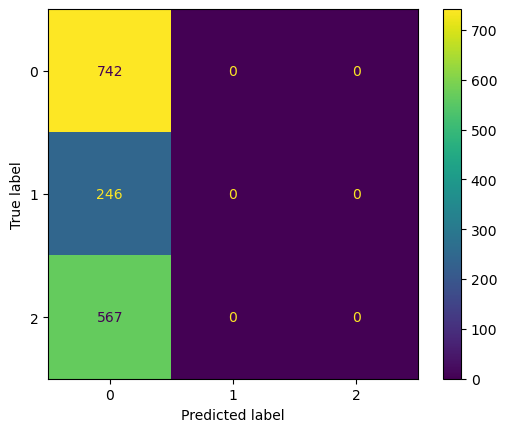

In [162]:
#Generate the confusion matrix and display
cm = confusion_matrix(y_test_array, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()

In [213]:
train_acc = history.history['accuracy']

# Print train accuracy for the last epoch
train_acc_last_epoch = train_acc[-1]
print("Train Accuracy:", train_acc_last_epoch)


Train Accuracy: 0.4428112208843231


Interestingly, our RNN GRU model was only able to learn and make predictions for our majority class 0 (Left) articles. Although it has a suspiciously good recall of 100% (742/742) for class 0, the results show that the model performed poorly for classes 1 and 2 where there are no correctly predicted instances. 

We know that we have a considerable class imbalance. What if we balanced our class distribution with the SMOTE method. Would this improve our model's ability to learn patterns from the other classes?

Before we try this, we will attempt an LSTM RNN model and see if we get different results.

### Long Short-Term Memory

We know that an LSTM addresses the limitations of SimpleRNN by introducing a more complex memory cell design. It incorporates a gating mechanism that allows the LSTM layer to selectively remember and forget information from the past. This gating mechanism consists of three main components: the input gate, the forget gate, and the output gate. By regulating the flow of information, LSTMs can effectively capture and retain long-term dependencies in sequences. They are particularly useful in tasks where preserving and utilizing distant contextual information is important.

In [150]:
#random seeds for reproducability
np.random.seed(123)

number_of_classes = 3
embedding_dim = 300
input_length = 600

#Define model architecture
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, 
                    input_length=input_length))

LSTM_model.add(LSTM(128, activation='relu', return_sequences=False))
LSTM_model.add(BatchNormalization())

LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(BatchNormalization())

LSTM_model.add(Dense(number_of_classes, activation='softmax'))

In [151]:
#Compile the model with the custom metric
LSTM_model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [152]:
#Display its summary
LSTM_model.summary()

Model: "sequential_29"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 600, 300)          19998300  
                                                                 
 lstm (LSTM)                 (None, 128)               219648    
                                                                 
 batch_normalization_3 (Batc  (None, 128)              512       
 hNormalization)                                                 
                                                                 
 dense_87 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_4 (Batc  (None, 64)               256       
 hNormalization)                                                 
                                                                 
 dense_88 (Dense)            (None, 3)               

In [153]:
history = LSTM_model.fit(X_train_array, y_train_array,
        batch_size=1024,
        epochs=5,
        validation_data=(X_val_array, y_val_array))

Epoch 1/5
5/5 [==============================] - 28s 5s/step - loss: 1.0950 - accuracy: 0.4720 - val_loss: 1.0845 - val_accuracy: 0.4753
Epoch 2/5
5/5 [==============================] - 26s 5s/step - loss: 1.0841 - accuracy: 0.4720 - val_loss: 1.0737 - val_accuracy: 0.4753
Epoch 3/5
5/5 [==============================] - 24s 5s/step - loss: 1.0735 - accuracy: 0.4720 - val_loss: 1.0633 - val_accuracy: 0.4753
Epoch 4/5
5/5 [==============================] - 25s 5s/step - loss: 1.0626 - accuracy: 0.4720 - val_loss: 1.0529 - val_accuracy: 0.4753
Epoch 5/5
5/5 [==============================] - 25s 5s/step - loss: 1.0527 - accuracy: 0.4720 - val_loss: 1.0432 - val_accuracy: 0.4753


In [154]:
#Make predictions on the test set
y_pred_probs = LSTM_model.predict(X_test_array)
y_pred = np.argmax(y_pred_probs, axis=1)

#Calculate precision, recall, and F1 score
report = classification_report(y_test_array, y_pred)
print(report)

49/49 [==============================] - 6s 116ms/step
              precision    recall  f1-score   support

           0       0.48      1.00      0.65       742
           1       0.00      0.00      0.00       246
           2       0.00      0.00      0.00       567

    accuracy                           0.48      1555
   macro avg       0.16      0.33      0.22      1555
weighted avg       0.23      0.48      0.31      1555



/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


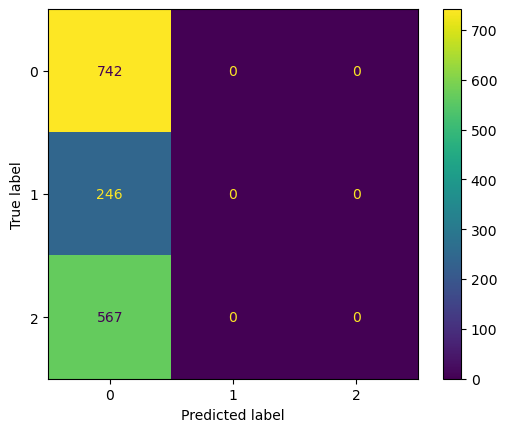

In [155]:
#Generate the confusion matrix and display
cm = confusion_matrix(y_test_array, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()

With an LSTM RNN model, we achieved the same results and challenge as we did with our GRU RNN model, where the model was only able to predict instances for class 0 and none for the other classes at all. 

The fact that we achieved the exact same results for both our LSTM and GRU models is not necessarily surprising. Both are variants of Recurrent Neural Networks that are designed to capture sequential information and have similar architectures. The key main difference between GRU and LSTM is the number and types of gates they use to control the flow of information within the network.

We know that the goal of GRU and LSTM models is to minimize the overall loss during training, commonly done through gradient-based optimization algorithms. When the majority class (class 0) dominates the dataset, the models tend to optimize their predictions towards the majority class, as it minimizes the loss more effectively. This bias can result in poor predictions for the minority classes.

Let's try to address the class imbalance by applying SMOTE to oversample for our minority classes, and attempt to rerun our GRU and LSTM RNN models.

### Synthetic Minority Oversampling Technique (SMOTE)

We will apply SMOTE from the start, beginning with splitting our data into our train, validation, and test sets. 

In [163]:
#Split the data into training, validation, and test sets
#20% test, 80% remainder
X_rem, X_test, y_rem, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#Out of the remainder, we split 30% validation and 70% train 
X_train, X_val, y_train, y_val = train_test_split(X_rem, y_rem, test_size=0.3, random_state=42)

We next convert our data sets into arrays.

In [ ]:
#Convert X_train vectors to arrays
X_train_array = np.array(X_train['title_vectors'].tolist())
X_train_array = np.concatenate([X_train_array, np.array(X_train['content_vectors'].tolist())], axis=1)

#Convert X_val vectors to arrays
X_val_array = np.array(X_val['title_vectors'].tolist())
X_val_array = np.concatenate([X_val_array, np.array(X_val['content_vectors'].tolist())], axis=1)

#Convert X_test vectors to arrays
X_test_array = np.array(X_test['title_vectors'].tolist())
X_test_array = np.concatenate([X_test_array, np.array(X_test['content_vectors'].tolist())], axis=1)

#Convert y_train vectors to arrays
y_train_array = np.array(y_train.tolist())

#Convert y_val vectors to arrays
y_val_array = np.array(y_val.tolist())

#Convert y_test vectors to arrays
y_test_array = np.array(y_test.tolist())


We are now ready to import SMOTE and apply it to our train data. 

In [ ]:
#Import SMOTE
from imblearn.over_sampling import SMOTE

In [165]:
#Initialize SMOTE
smote = SMOTE(random_state=42)

#Apply SMOTE to the training set
X_train_smote, y_train_smote = smote.fit_resample(X_train_array, y_train_array)

We can now take a look at how SMOTE has balanced our class distribution...

In [166]:
#Convert y_train_smote to a DataFrame
y_train_smote_df = pd.DataFrame({'political_bias': y_train_smote})

#Print class distribution before applying SMOTE
print("Before SMOTE:")
print(y_train.value_counts())

#Print class distribution after applying SMOTE
print("\nAfter SMOTE:")
print(y_train_smote_df['political_bias'].value_counts())

Before SMOTE:
0    2055
2    1609
1     690
Name: political_bias, dtype: int64

After SMOTE:
0    2055
1    2055
2    2055
Name: political_bias, dtype: int64


Now that our classes are balanced, and we have more data to work with, hopefully our models can pick up information from what were previously minority classes. 

We try a GRU model first with the same architecture as before, followed by an LSTM.

In [167]:
#random seeds for reproducability
np.random.seed(123)

number_of_classes = 3
embedding_dim = 300
input_length = 600

#define model architecture
GRU_model = Sequential()
GRU_model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, 
                    input_length=input_length))

#intermediate recurrent layers, return sequences...
GRU_model.add(GRU(64, activation='relu', return_sequences=True))
GRU_model.add(BatchNormalization())
GRU_model.add(Dropout(0.15))

GRU_model.add(GRU(32, activation='relu', return_sequences=False))
GRU_model.add(BatchNormalization())
GRU_model.add(Dropout(0.15))

GRU_model.add(Dense(16, activation='relu'))
GRU_model.add(BatchNormalization())
GRU_model.add(Dropout(0.15))

#last recurrent layer only returns the final output
GRU_model.add(Dense(number_of_classes, activation='softmax'))

In [168]:
#Compile the model
GRU_model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [169]:
#Display summary
GRU_model.summary()

Model: "sequential_31"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_3 (Embedding)     (None, 600, 300)          19998300  
                                                                 
 gru_4 (GRU)                 (None, 600, 64)           70272     
                                                                 
 batch_normalization_8 (Batc  (None, 600, 64)          256       
 hNormalization)                                                 
                                                                 
 dropout_6 (Dropout)         (None, 600, 64)           0         
                                                                 
 gru_5 (GRU)                 (None, 32)                9408      
                                                                 
 batch_normalization_9 (Batc  (None, 32)               128       
 hNormalization)                                     

In [170]:
history = GRU_model.fit(X_train_smote, y_train_smote,
        batch_size=1024,
        epochs=5,
        validation_data=(X_val_array, y_val_array))

Epoch 1/5
7/7 [==============================] - 34s 4s/step - loss: 1.1116 - accuracy: 0.3293 - val_loss: 1.0984 - val_accuracy: 0.3617
Epoch 2/5
7/7 [==============================] - 29s 4s/step - loss: 1.1029 - accuracy: 0.3450 - val_loss: 1.0979 - val_accuracy: 0.3617
Epoch 3/5
7/7 [==============================] - 29s 4s/step - loss: 1.1060 - accuracy: 0.3306 - val_loss: 1.0972 - val_accuracy: 0.3617
Epoch 4/5
7/7 [==============================] - 29s 4s/step - loss: 1.1033 - accuracy: 0.3275 - val_loss: 1.0971 - val_accuracy: 0.3617
Epoch 5/5
7/7 [==============================] - 29s 4s/step - loss: 1.1022 - accuracy: 0.3328 - val_loss: 1.0961 - val_accuracy: 0.3617


In [171]:
#Make predictions on the test set
y_pred_probs = GRU_model.predict(X_test_array)
y_pred = np.argmax(y_pred_probs, axis=1)

#Calculate precision, recall, and F1 score
report = classification_report(y_test_array, y_pred)
print(report)

49/49 [==============================] - 5s 89ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       742
           1       0.00      0.00      0.00       246
           2       0.36      1.00      0.53       567

    accuracy                           0.36      1555
   macro avg       0.12      0.33      0.18      1555
weighted avg       0.13      0.36      0.19      1555



/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


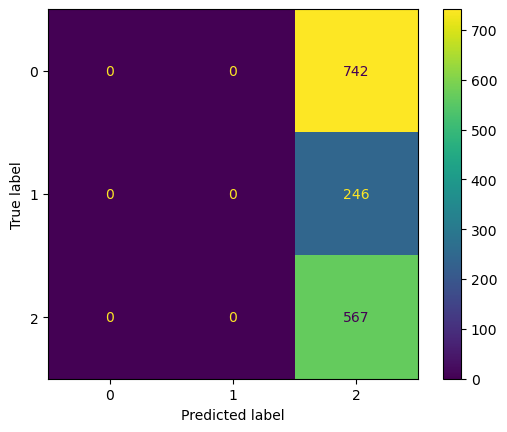

In [172]:
#Generate the confusion matrix
cm = confusion_matrix(y_test_array, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()

After performing SMOTE to acheive an even class distribution, our model is still performing similarly. This time it can only make predictions for class 2 and nothing for classes 0 and 1. 

Let's try an LSTM model again on our balanced data. 

In [173]:
#random seeds for reproducability
np.random.seed(123)

number_of_classes = 3
embedding_dim = 300
input_length = 600

#model architecture
LSTM_model = Sequential()
LSTM_model.add(Embedding(input_dim=vocabulary_size, output_dim=embedding_dim, 
                    input_length=input_length))

LSTM_model.add(LSTM(128, activation='relu', return_sequences=False))
LSTM_model.add(BatchNormalization())

LSTM_model.add(Dense(64, activation='relu'))
LSTM_model.add(BatchNormalization())

LSTM_model.add(Dense(number_of_classes, activation='softmax'))

In [174]:
#Compile the model with the custom metric
LSTM_model.compile(loss="sparse_categorical_crossentropy", 
              optimizer="adam",
              metrics=["accuracy"])

In [175]:
#Display its summary
LSTM_model.summary()

Model: "sequential_32"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_4 (Embedding)     (None, 600, 300)          19998300  
                                                                 
 lstm_1 (LSTM)               (None, 128)               219648    
                                                                 
 batch_normalization_11 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dense_93 (Dense)            (None, 64)                8256      
                                                                 
 batch_normalization_12 (Bat  (None, 64)               256       
 chNormalization)                                                
                                                                 
 dense_94 (Dense)            (None, 3)               

In [176]:
history = LSTM_model.fit(X_train_smote, y_train_smote,
        batch_size=1024,
        epochs=5,
        validation_data=(X_val_array, y_val_array))

Epoch 1/5
7/7 [==============================] - 39s 5s/step - loss: 1.0987 - accuracy: 0.3333 - val_loss: 1.0899 - val_accuracy: 0.4753
Epoch 2/5
7/7 [==============================] - 37s 5s/step - loss: 1.0986 - accuracy: 0.3273 - val_loss: 1.0894 - val_accuracy: 0.3617
Epoch 3/5
7/7 [==============================] - 37s 5s/step - loss: 1.0988 - accuracy: 0.3333 - val_loss: 1.0889 - val_accuracy: 0.3617
Epoch 4/5
7/7 [==============================] - 41s 6s/step - loss: 1.0989 - accuracy: 0.3333 - val_loss: 1.0913 - val_accuracy: 0.3617
Epoch 5/5
7/7 [==============================] - 37s 5s/step - loss: 1.0991 - accuracy: 0.3333 - val_loss: 1.0917 - val_accuracy: 0.3617


In [178]:
#Make predictions on the test set
y_pred_probs = LSTM_model.predict(X_test_array)
y_pred = np.argmax(y_pred_probs, axis=1)

#Calculate precision, recall, and F1 score
report = classification_report(y_test_array, y_pred)
print(report)

49/49 [==============================] - 6s 121ms/step
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       742
           1       0.00      0.00      0.00       246
           2       0.36      1.00      0.53       567

    accuracy                           0.36      1555
   macro avg       0.12      0.33      0.18      1555
weighted avg       0.13      0.36      0.19      1555



/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mel/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


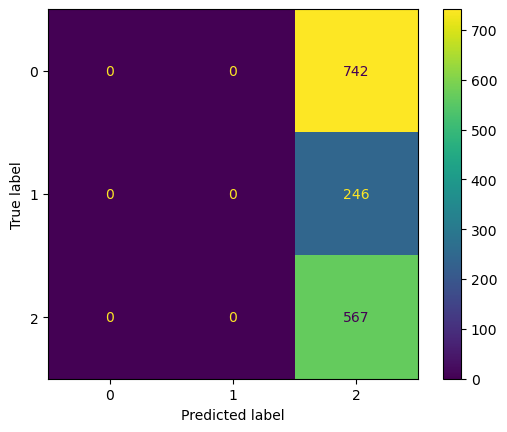

In [179]:
#Generate  matrix 
cm = confusion_matrix(y_test_array, y_pred)

ConfusionMatrixDisplay(cm).plot()
plt.show()

We achieved the exact same results as our GRU model did where the model only learned and predicted instances for class 2 and nothing for classes 0 and 1, even with a balanced class distribution. 

For further analysis in the future, we could try other techniques to address our class imbalance such as undersampling the majority class (since we only tried oversampling the minoriy classes). However the risk with undersampling is we work with less data for our model to train on. Other options are to increase the complexity of our model (for example, add more hidden layers), perform extensive hyperparameter tuning to try to improve the model's performance, or apply advanced techniques like class weights or cost-sensitive learning. 

### Findings Summary and Conclusion

Overall, after fitting our data into several machine learning models including a logistic regression model, KNN, Decision Tree, Random Forest, XGBoost, Neural Network, and Recurrent Neural Network, our Neural Network performed the best at a weighted average recall score of 60% based on a high recall score of 83% on our majority class ("From the Left"), 25% on our minority class ("From the Centre"), and 44% on our third class ("From the Right"). 

Returning to our problem statement of whether or not we can predict media bias in the news articles we read every day, we can infer that we can predict media bias for Left-labeled news sources because our model was able to pick up strong patterns in the text. Centre-labled articles were harder to predict and this may be due to a couple reasons. One could be that there are not enough patterns for our model to learn. Centre-leaning articles have after all a more neutral perspective than its neighbouring Left and Right extremes on the spectrum. Second is there was simply not enough data for this class. It may be worth exploring dropping the Centre class and just train our models with Left and Right labeled articles. This may allow our models to pick up more distinct patterns between the two extremes and cut out some of the ambiguity and noise that Centre-leaning articles may present.

RNNs are known to perform very well reading contextual, semantic text data, however we saw that our model was only able to predict one class every time and fail to predict anything at all on our other two classes. Even with a 100% recall score for one class, the inability to pick up patterns from the other two classes makes our model quite useless. 

To test if our poor model performances were caused by an imbalanced dataset, we applied the SMOTE method to oversample our class 1 and 2 and successfully achieved a balanced class distribution. However after retrying the Recurrent Neural Networks, performance remained poor and they were still only able to predict one class and failed to predict the others. As mentioned earlier, it may be worth returning to the architecture of our RNNs and increasing their complexity, tuning their parameteres, and try modifying class weights or applying cost-sensitive learning. 

See Executive Report for recommendations.

### References

The code used in this notebook are adopted from BrainStation's learning content for the Data Science bootcamp program.

Refer to the accompanying Executive Summary for a high-level report on the project, our findings, and recommendations. 